<a href="https://colab.research.google.com/github/7692TITO/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS_Tito_Varghese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

#**Importing Libraries** **(Data Collection)**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
from wordcloud import WordCloud

In [2]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


In [4]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing the dataset

zomato_reviews_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant Clustering and Sentimental Analysis-Tito Varghese/Zomato Restaurant reviews.csv')
zomato_restaurant_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant Clustering and Sentimental Analysis-Tito Varghese/Zomato Restaurant names and Metadata.csv')

#**Dataset Inspection and Cleaning**

###**Zomato Restaurant Data Set**

In [6]:
#to get the shape of the dataset
zomato_restaurant_df.shape

(105, 6)

In [7]:
#to find the data type and non-null count in the features
zomato_restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


1.The Zomato_restuarant dataset consist of 105 rows and 6 features.

2.The data types of all the features are object.

3.Two features are having missing values i.e the collections and timings features.



In [8]:
#inorder to find out the dataset description
zomato_restaurant_df.describe().transpose()

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


1.The most common cuisines available in the most of the restaurant is the North Indian and Chinese. Hence we can say that there is a high demand for these cuisines from the customers end.

2.The most frequent working hours of the restaurant is between 11am to 11pm.

3.The billing amount of rupees 500 is the most frequent cost paid by the customers on their order.




In [9]:
# changing the data type of the cost feature to numeric
zomato_restaurant_df['Cost'] = zomato_restaurant_df['Cost'].str.replace(",","").astype('int64')

In [10]:
# to see the first five rows of the data set
zomato_restaurant_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [11]:
#to find out the missing values in the data set
zomato_restaurant_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

###The collections feature has 54 null values and timings feature has 1 null value.
###Dropping off the nan values in Collection feature will not be a good idea because out of 105 rows if we drop 54 rows it may lead to loss of data information.Hence we will replace nan value in Collection feature with Tags Undefined.

In [12]:
#Replacing the null obsevations in the Collections feature with Tags Undefined
zomato_restaurant_df['Collections'].fillna('Tags Undefined',inplace=True)

In [13]:
# since all the data is cleaned and there is 1 missing data in Timings feature which we can drop 
zomato_restaurant_df.dropna(inplace=True)

In [14]:
# missing values in the data set
zomato_restaurant_df.isnull().sum()

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64

In [15]:
#checking for duplicate rows in the data set
zomato_restaurant_df.duplicated().sum()

0

###The data set does not contain any duplicate rows

In [16]:
#Final shape of our zomato restaurant data after cleaning the data set
zomato_restaurant_df.shape

(104, 6)

### **Zomato Customer Review Dataset**

In [17]:
#to get the shape of the dataset
zomato_reviews_df.shape

(10000, 7)

###The dataset consist of 10,000 rows and 7 columns

In [18]:
#to get the information about the data set
zomato_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


The data type of all the features except Pictures are Object data type.

The Pictures feature is an integer data type

Apart from Restaurant and Pictures features,rest all other features consists of null values

In [19]:
#to know the dataset description
zomato_reviews_df.describe(include= 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


In [20]:
#to find the duplicate rows in the data set
zomato_reviews_df.duplicated().sum()

36

We have 36 duplicate rows,hence we will drop these duplicate rows

In [21]:
# drop the duplicate rows and Resetting the index after dropping the duplicate rows from the data set
zomato_reviews_df = zomato_reviews_df.drop_duplicates().reset_index()

#dropping the old index column
zomato_reviews_df.drop(labels='index',axis=1,inplace=True)

In [22]:
#to find the missing values in the data set
zomato_reviews_df.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [23]:
#printing the first five rows of the data set
zomato_reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [24]:
zomato_reviews_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

We can see that rating value has one string value 'Like',which is acts as an anomaly.hence we will replace it to nan 

In [25]:
# Replacing the rating value 'LIKE' to nan
zomato_reviews_df.loc[zomato_reviews_df['Rating'] == 'Like'] = np.nan

In [26]:
#Converting the data type of Rating and Time
zomato_reviews_df['Rating'] = zomato_reviews_df['Rating'].astype('float64')
zomato_reviews_df['Time'] = pd.to_datetime(zomato_reviews_df['Time'])

In [27]:
#feature engineering on Time feature(adding new features)
zomato_reviews_df['Hour'] = pd.DatetimeIndex(zomato_reviews_df['Time']).hour
zomato_reviews_df['Week'] = pd.DatetimeIndex(zomato_reviews_df['Time']).week
zomato_reviews_df['Month'] = pd.DatetimeIndex(zomato_reviews_df['Time']).month
zomato_reviews_df['Year'] = pd.DatetimeIndex(zomato_reviews_df['Time']).year



In [28]:
#feature engineering on Metadata  feature(adding new features)
zomato_reviews_df['Reviews'],zomato_reviews_df['Followers']=zomato_reviews_df['Metadata'].str.split(',').str
zomato_reviews_df['Reviews'] = pd.to_numeric(zomato_reviews_df['Reviews'].str.split(' ').str[0])
zomato_reviews_df['Followers'] = pd.to_numeric(zomato_reviews_df['Followers'].str.split(' ').str[1])

In [29]:
#dropping the metadata after feature engineering
zomato_reviews_df = zomato_reviews_df.drop(['Metadata'], axis =1)

In [30]:
zomato_reviews_df.isnull().sum()

Restaurant       1
Reviewer         3
Review          10
Rating           3
Time             3
Pictures         1
Hour             3
Week             3
Month            3
Year             3
Reviews          3
Followers     1581
dtype: int64

In [31]:
# checking the null obsevations in the Followers feature
zomato_reviews_df[zomato_reviews_df['Followers'].isnull()]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Hour,Week,Month,Year,Reviews,Followers
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5.0,2019-05-24 15:22:00,0.0,15.0,21.0,5.0,2019.0,1.0,NaN
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5.0,2019-05-24 01:02:00,0.0,1.0,21.0,5.0,2019.0,1.0,NaN
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4.0,2019-05-23 15:01:00,0.0,15.0,21.0,5.0,2019.0,1.0,NaN
14,Beyond Flavours,Kankaria.ritu,"We ordered corn cheese balls, manchow soup and...",1.0,2019-05-22 21:19:00,0.0,21.0,21.0,5.0,2019.0,1.0,NaN
24,Beyond Flavours,Amritap Datta,"Excellent experience, mouthwatering food, good...",5.0,2019-05-20 23:33:00,0.0,23.0,21.0,5.0,2019.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9876,Chinese Pavilion,Anil Rao,The tofu with mushrooms was absolutely wonderf...,5.0,2019-04-04 02:15:00,0.0,2.0,14.0,4.0,2019.0,9.0,NaN
9882,Chinese Pavilion,Ajay Munjal,The food is delicious. Service is excellent. I...,5.0,2019-02-16 13:56:00,0.0,13.0,7.0,2.0,2019.0,4.0,NaN
9897,Chinese Pavilion,Korak Mukherjee,I was here last night with 2 of my friends. We...,1.0,2018-05-29 16:02:00,1.0,16.0,22.0,5.0,2018.0,9.0,NaN
9904,Chinese Pavilion,Anubinda Dash,The food was amazing. Do not forget to try 'Mo...,4.5,2018-03-02 19:54:00,10.0,19.0,9.0,3.0,2018.0,11.0,NaN


In [32]:
#Replacing the null obsevations in the Followers feature with 0
zomato_reviews_df['Followers'].fillna(0,inplace=True)

In [33]:
# since all the data is cleaned and the missing data is common for all the features we can drop them all
zomato_reviews_df.dropna(inplace=True)

In [34]:
zomato_reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Hour          0
Week          0
Month         0
Year          0
Reviews       0
Followers     0
dtype: int64

In [35]:
# Final shape of our zomato review data set after cleaning
zomato_reviews_df.shape

(9954, 12)

#**Exploratory Data Analysis**

Exploratory data analysis is a crucial part of data analysis. It involves exploring and analyzing the dataset given to find patterns, trends and conclusions to make better decisions related to the data, often using statistical graphics and other data visualization tools to summarize the results. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it.

Some important aspects to include in the project are as follows:

Best restaurants in the city on the basis of Ratings

The Most Popular Cuisines 

The Most Common Tags given to the Restaurants

The most affordable and the expensive Restaurants

Cuisines and their Costing

Active Reviewer 







##**Zomato Restaurant Data Set**

##**Restaurants**

Top 30 Expensive Restaurants


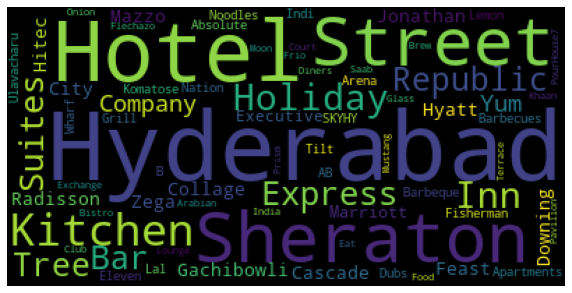

In [36]:
#Creating the wordcloud
print('Top 30 Expensive Restaurants')
plt.figure( figsize=(10,10) )
wc=WordCloud().generate(" ".join(name for name in zomato_restaurant_df.sort_values('Cost',ascending=False).Name[:30]))
plt.imshow(wc)
plt.axis('off')
plt.show()

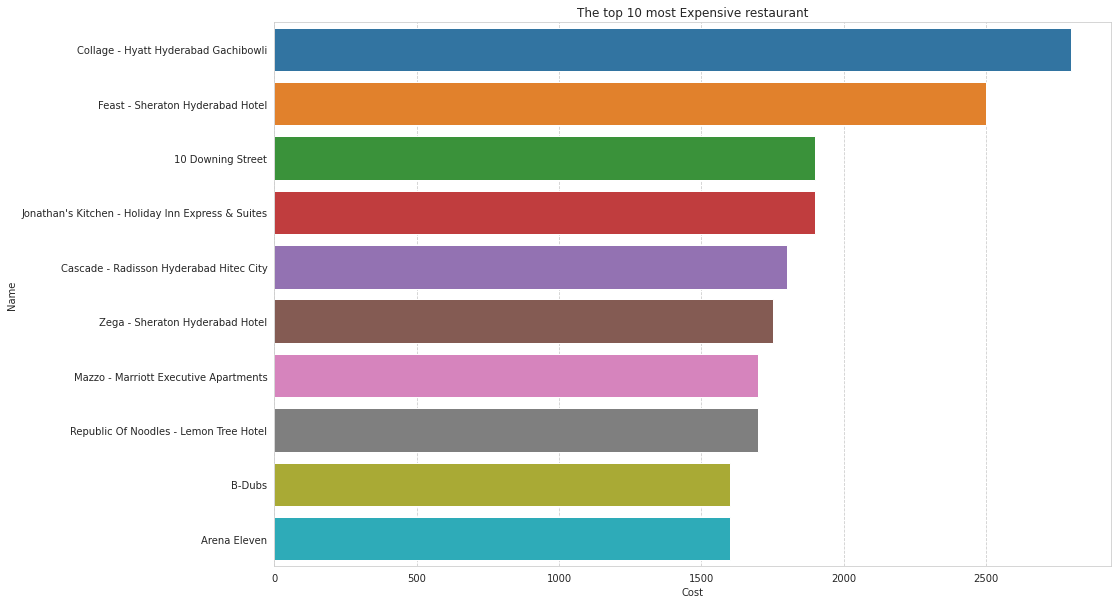

In [37]:
#The top 10 most expensive restaurants
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(x='Cost',
            y="Name", 
            data=zomato_restaurant_df, 
            order=zomato_restaurant_df.sort_values('Cost',ascending=False).Name[:10])

plt.title('The top 10 most Expensive restaurant')
plt.show()

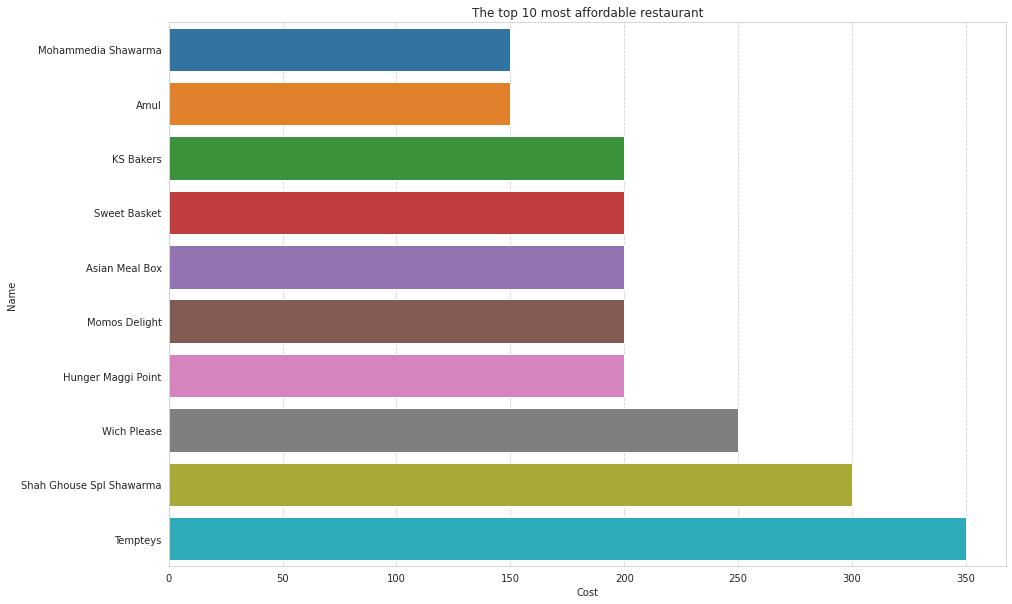

In [38]:
#The top 10 most affordable restaurants

figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(x='Cost',
            y="Name", 
            data=zomato_restaurant_df, 
            order=zomato_restaurant_df.sort_values('Cost').Name[:10])


plt.title('The top 10 most affordable restaurant')
plt.show()

##**Cuisines**

Top Cuisines


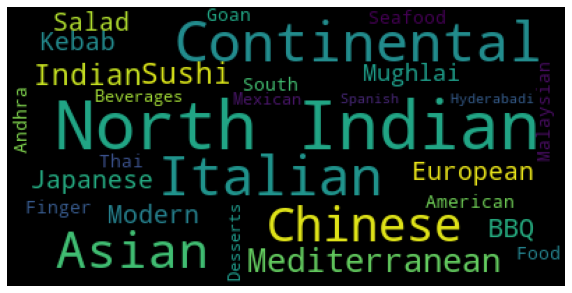

In [39]:
#Creating the wordcloud
print('Top Cuisines')
plt.figure( figsize=(10,10) )
wc=WordCloud().generate(" ".join(name for name in zomato_restaurant_df.sort_values('Cost',ascending=False).Cuisines[:30]))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [40]:
#let's see the most on demand cuisines available
zomato_restaurant_df['Cuisines'].value_counts().transpose()

North Indian, Chinese                                   4
North Indian                                            3
North Indian, Biryani, Chinese                          2
Fast Food                                               2
Biryani, North Indian, Chinese                          2
                                                       ..
Andhra, Biryani, Hyderabadi, North Indian               1
Biryani, South Indian, North Indian, Chinese, Andhra    1
Italian, North Indian, South Indian, Asian              1
North Indian, Fast Food                                 1
Thai, Asian, Chinese, Malaysian                         1
Name: Cuisines, Length: 91, dtype: int64

In [41]:
#Splitting the Cuisines feature and storing it into a list
zomato_restaurant_df['Cuisines']=zomato_restaurant_df['Cuisines'].str.split(', ')

In [42]:
#Using explode method to converts each element of the Cuisines column into a row.
zomato_restaurant_df= zomato_restaurant_df.explode('Cuisines')

In [43]:
#top five cuisines highly on demand
zomato_restaurant_df['Cuisines'].value_counts()[:5]

North Indian    60
Chinese         43
Continental     21
Biryani         16
Fast Food       15
Name: Cuisines, dtype: int64

In [44]:
#Grouping Cuisines by Restaurants count
cuisine_df = zomato_restaurant_df.groupby(['Cuisines']).agg({'Name':'count'}).reset_index()

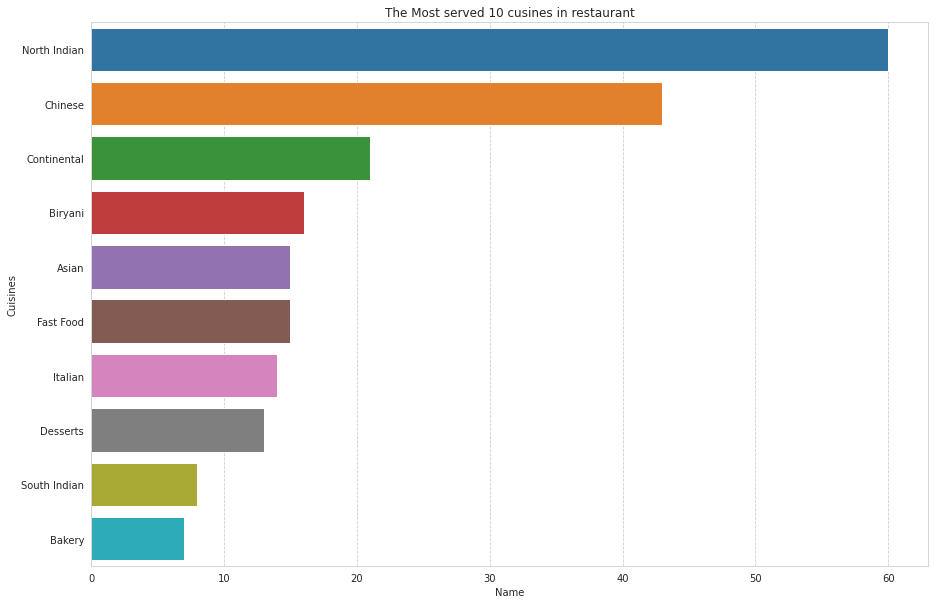

In [45]:
# The top 10 cuisines highly on demand in restaurants
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(y='Cuisines',
            x="Name", 
            data=cuisine_df, 
            order=cuisine_df.sort_values('Name',ascending=False).Cuisines[:10])
   

plt.title('The Most served 10 cusines in restaurant')
plt.show()

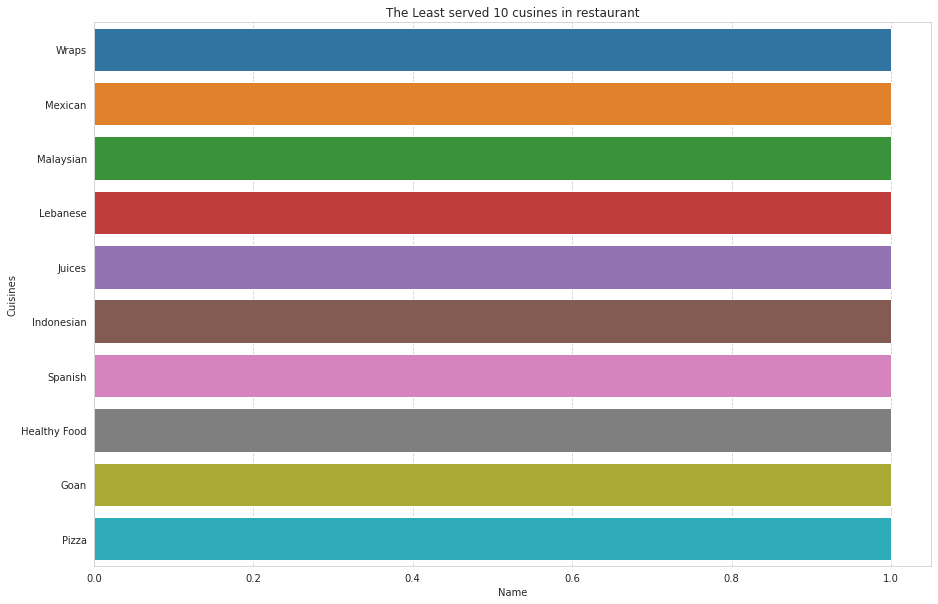

In [46]:
#The least on demand 10 cuisines in restaurants
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(y='Cuisines',
            x="Name", 
            data=cuisine_df, 
            order=cuisine_df.sort_values('Name').Cuisines[:10])
   

plt.title('The Least served 10 cusines in restaurant')
plt.show()

In [47]:
#Grouping Cuisines by Mean Cost
cuisine_df1 = zomato_restaurant_df.groupby(['Cuisines']).agg({'Cost':'mean'}).reset_index()

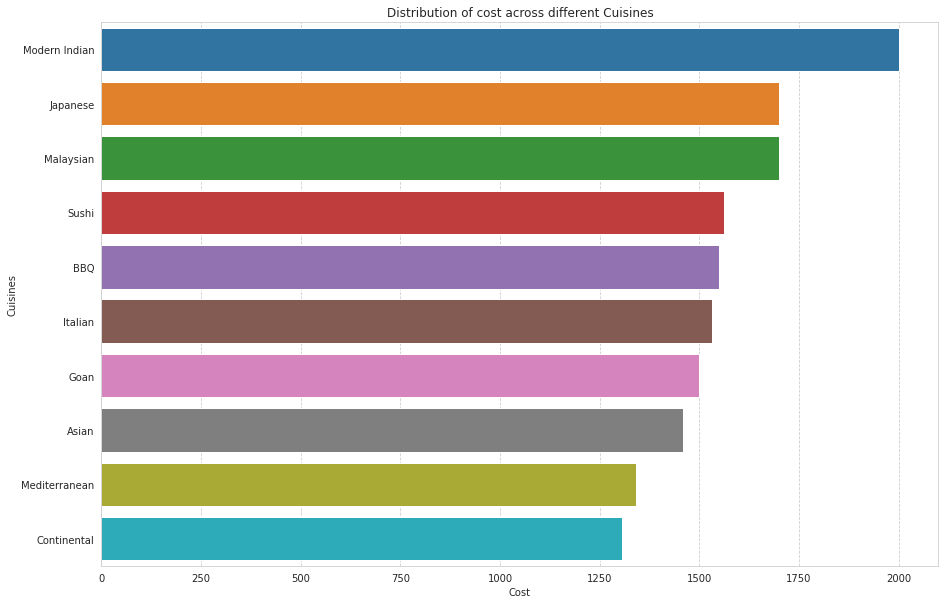

In [48]:
#The top 10 most expensive cuisines
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(x='Cost',
            y="Cuisines", 
            data=cuisine_df1, 
            order=cuisine_df1.sort_values('Cost',ascending=False).Cuisines[:10])

plt.title('Distribution of cost across different Cuisines')
plt.show()

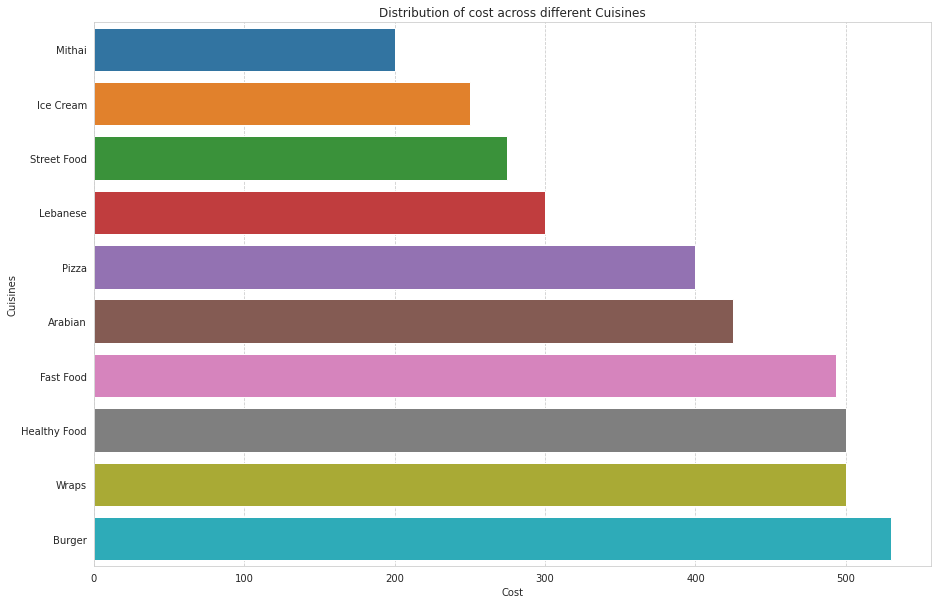

In [49]:
#The top 10 most affordable cuisines
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(x='Cost',
            y="Cuisines", 
            data=cuisine_df1, 
            order=cuisine_df1.sort_values('Cost',ascending=True).Cuisines[:10])

plt.title('Distribution of cost across different Cuisines')
plt.show()

In [50]:
#Grouping restaurants by number of cuisines available
restaurant_df = zomato_restaurant_df.groupby(['Name']).agg({'Cuisines':'count'}).reset_index()

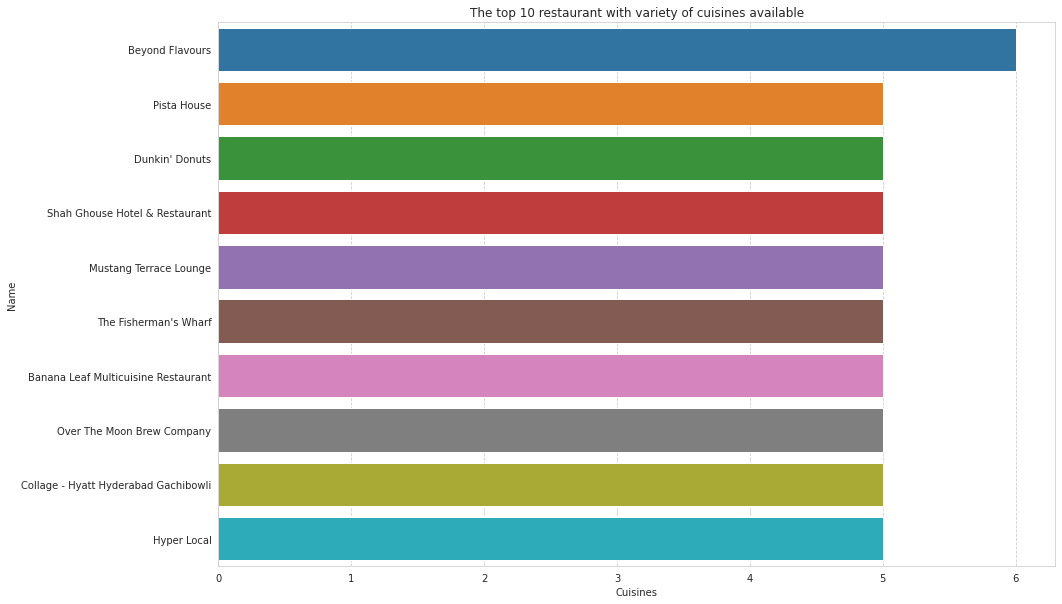

In [51]:
#The top 10 restaurant with variety of cuisines available

figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(x='Cuisines',
            y="Name", 
            data=restaurant_df, 
            order=restaurant_df.sort_values('Cuisines',ascending=False).Name[:10])


plt.title('The top 10 restaurant with variety of cuisines available')
plt.show()

##**Collections (tagging different restaurants based on zomato categories)**

Top 30 Restaurant Tags


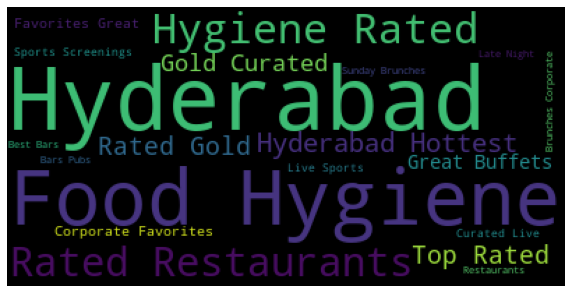

In [52]:
#Creating the wordcloud
print('Top 30 Restaurant Tags')
plt.figure( figsize=(10,10) )
wc=WordCloud().generate(" ".join(name for name in zomato_restaurant_df.Collections[:30]))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [53]:
#Splitting the Collection feature and storing it into a list
collectn_list = zomato_restaurant_df['Collections'].str.split(', ')
collectn_list

0      [Food Hygiene Rated Restaurants in Hyderabad, ...
0      [Food Hygiene Rated Restaurants in Hyderabad, ...
0      [Food Hygiene Rated Restaurants in Hyderabad, ...
0      [Food Hygiene Rated Restaurants in Hyderabad, ...
0      [Food Hygiene Rated Restaurants in Hyderabad, ...
                             ...                        
103                                     [Tags Undefined]
104                               [Pan-Asian Delicacies]
104                               [Pan-Asian Delicacies]
104                               [Pan-Asian Delicacies]
104                               [Pan-Asian Delicacies]
Name: Collections, Length: 310, dtype: object

In [54]:
#creating a dictitionary to store collections and its counts for different restaurants
collectn_dict = {}
for collections in collectn_list:
  for collection in collections:
    if collection in collectn_dict:
      collectn_dict[collection]+=1
    else:
      collectn_dict[collection]=1


In [55]:
# converting the cuisine dictionary to a data frame 
collections_df=pd.DataFrame.from_dict([collectn_dict]).transpose().reset_index().rename(columns={'index':'Collections',0:'Number of Restaurants'})

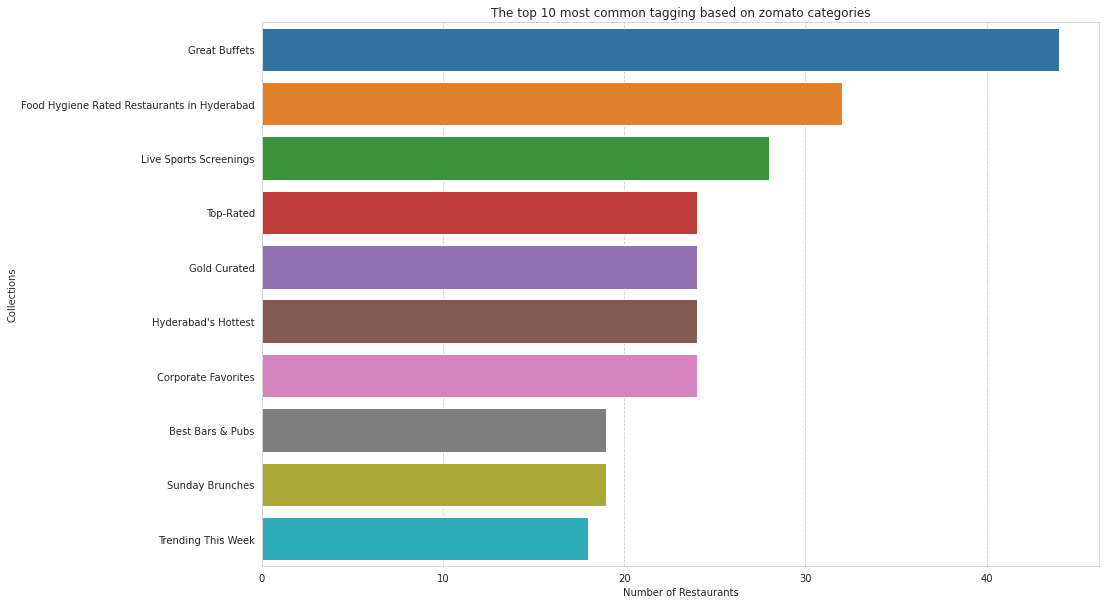

In [56]:
#The top 10 most common tagging based on zomato categories
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(y='Collections',
            x="Number of Restaurants", 
            data=collections_df, 
            order=collections_df.sort_values('Number of Restaurants',ascending=False).Collections[1:11])
   

plt.title('The top 10 most common tagging based on zomato categories')
plt.show()

##**Zomato Review Data Set**

##**Ratings**

In [57]:
#Let's find out restaurant with highest rating
restaurant_rating_df = zomato_reviews_df.groupby(['Restaurant']).agg({'Rating':'mean'}).reset_index()
restaurant_rating_df

,Restaurant,Rating
0,10 Downing Street,3.80
1,13 Dhaba,3.48
2,"3B's - Buddies, Bar & Barbecue",4.76
3,AB's - Absolute Barbecues,4.88
4,Absolute Sizzlers,3.62
...,...,...
95,Urban Asia - Kitchen & Bar,3.65
96,Yum Yum Tree - The Arabian Food Court,3.56
97,Zega - Sheraton Hyderabad Hotel,4.45
98,Zing's Northeast Kitchen,3.65


Text(0.5, 1.0, 'Top 10 Restaurants by Rating')

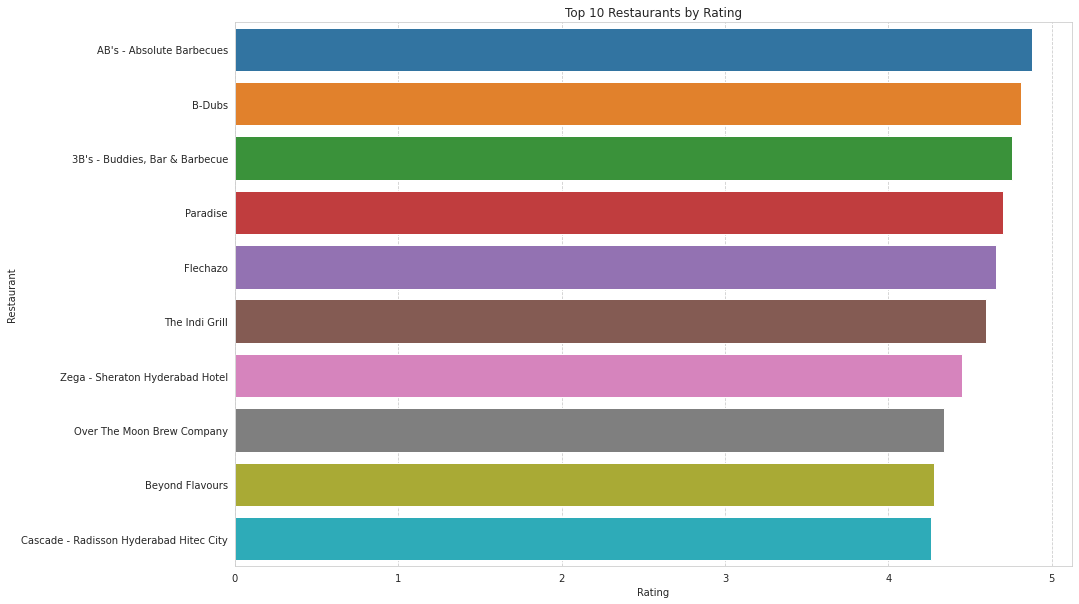

In [58]:
#The Top 10 restaurants based on the ratings
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(data=restaurant_rating_df, x='Rating', y='Restaurant', order=restaurant_rating_df.sort_values('Rating',ascending=False).Restaurant[:10])
plt.title('Top 10 Restaurants by Rating')

Text(0.5, 1.0, 'The Worst 10 Restaurants by Rating')

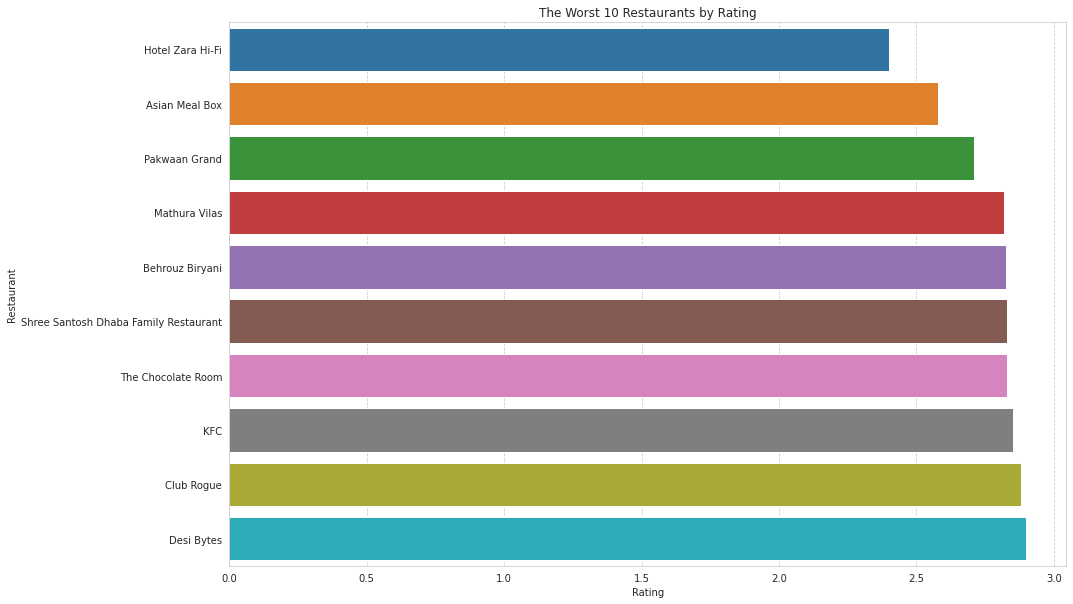

In [59]:
#The Worst 10 restaurants based on the ratings
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(data=restaurant_rating_df, x='Rating', y='Restaurant', order=restaurant_rating_df.sort_values('Rating').Restaurant[:10])
plt.title('The Worst 10 Restaurants by Rating')

##**Reviewer**

Most Rated Reviewer


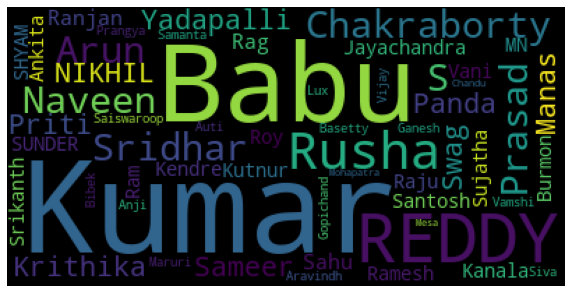

In [60]:
#Creating the wordcloud
print('Most Rated Reviewer')
plt.figure( figsize=(10,10) )
wc=WordCloud().generate(" ".join(name for name in zomato_reviews_df.sort_values('Rating',ascending=False).Reviewer[:30]))
plt.imshow(wc)
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Top 10 Reviewers by no of reviews')

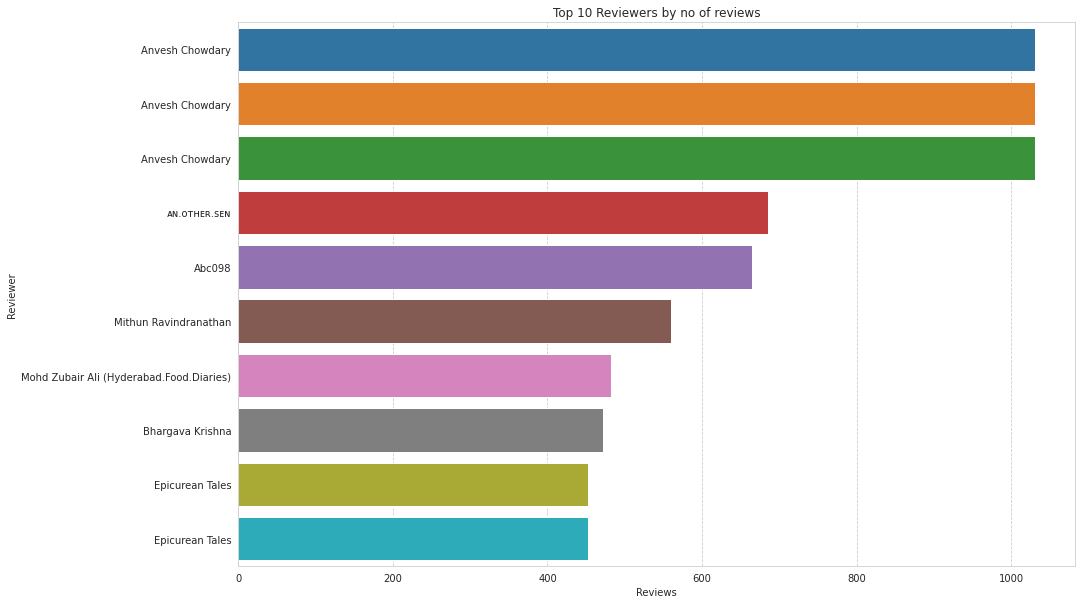

In [61]:
#The Top 10 Reviewers based on number of reviews
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(data=zomato_reviews_df, x='Reviews', y='Reviewer', order=zomato_reviews_df.sort_values('Reviews',ascending=False).Reviewer[:10])
plt.title('Top 10 Reviewers by no of reviews')

In [62]:
#Grouping Reviewers by Rating 
reviewer_ = zomato_reviews_df.groupby(['Reviewer']).agg({'Rating':'mean'}).reset_index()
reviewer_

,Reviewer,Rating
0,#FOODPORN,5.0
1,#chloesviews // CAH,5.0
2,$ign,4.0
3,4mybanti,2.0
4,@FuloriBinaChutneyKaiseBani,5.0
...,...,...
7437,ಅಭಿಷೇಕ್ ಉಪಾಧ್ಯ,4.0
7438,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,2.0
7439,✌️✌️Reddy 🥂🍽️,4.0
7440,✔️ Sonu,3.5


Text(0.5, 1.0, 'Top 10 Reviewers by ratings')

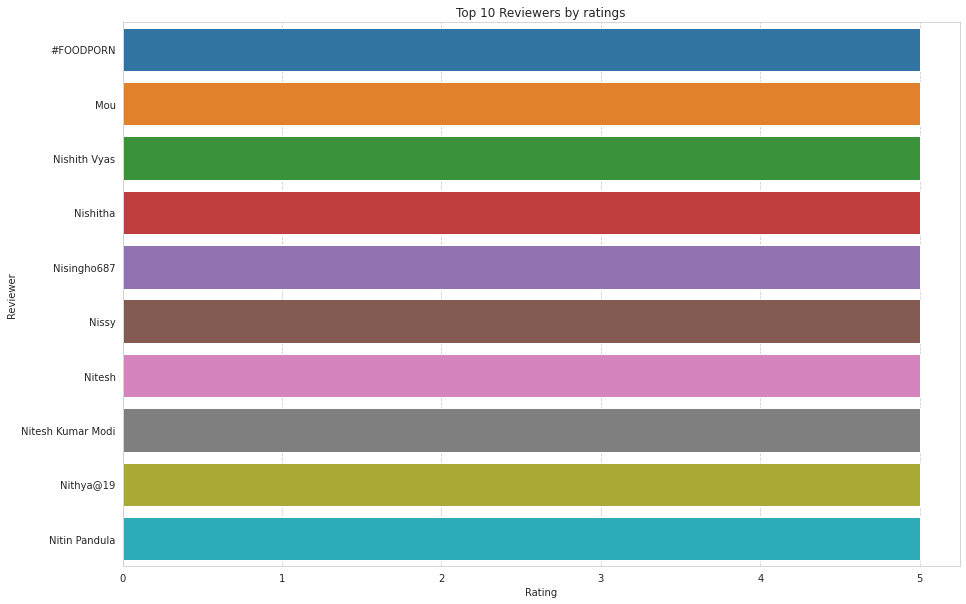

In [63]:
#The Top 10 Reviewers based on  ratings
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(data=reviewer_, x='Rating', y='Reviewer', order=reviewer_.sort_values('Rating',ascending=False).Reviewer[:10])
plt.title('Top 10 Reviewers by ratings')

In [64]:
#Grouping Reviewers by Rating Mean and by Reviews & Followers Sum
reviewer_df = zomato_reviews_df.groupby(['Reviewer']).agg({'Reviews':'sum','Followers':'sum','Rating':'mean'}).reset_index()
reviewer_df

,Reviewer,Reviews,Followers,Rating
0,#FOODPORN,35.0,5873.0,5.0
1,#chloesviews // CAH,3.0,1.0,5.0
2,$ign,50.0,55.0,4.0
3,4mybanti,7.0,4.0,2.0
4,@FuloriBinaChutneyKaiseBani,86.0,244.0,5.0
...,...,...,...,...
7437,ಅಭಿಷೇಕ್ ಉಪಾಧ್ಯ,3.0,30.0,4.0
7438,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685.0,794.0,2.0
7439,✌️✌️Reddy 🥂🍽️,94.0,99.0,4.0
7440,✔️ Sonu,78.0,156.0,3.5


Text(0.5, 1.0, 'Top 10 Reviewers by no of Followers')

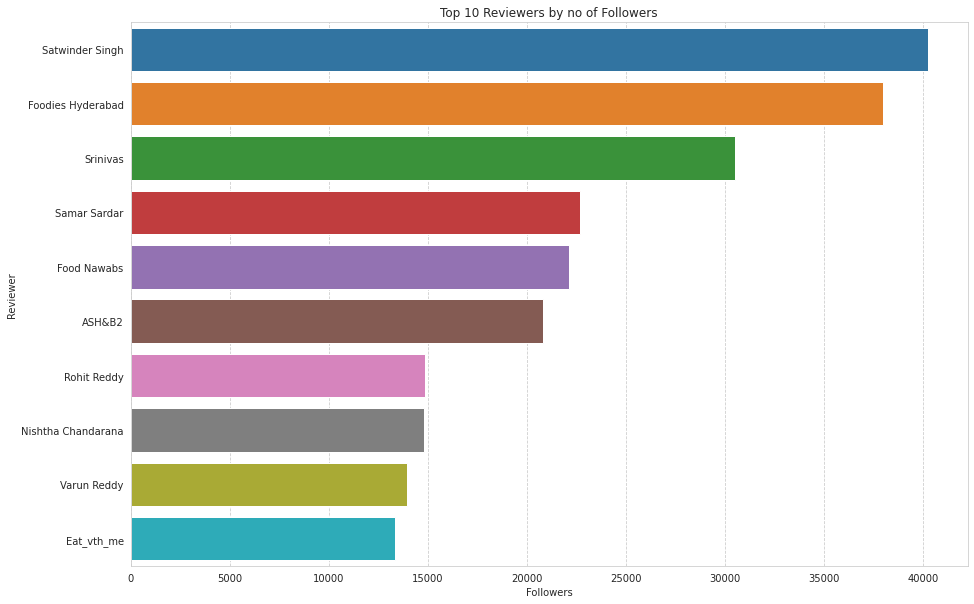

In [65]:
#The Top 10 Reviewers based on rating mean , reviews and followers sum
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(data=reviewer_df, x='Followers', y='Reviewer', order=reviewer_df.sort_values('Followers',ascending=False).Reviewer[:10])
plt.title('Top 10 Reviewers by no of Followers')

In [66]:
#finding the most active reviewer to be focused on
most_active_reviewer=reviewer_df[(reviewer_df['Followers'] > 1000)&(reviewer_df['Reviews']>1000)&(reviewer_df['Rating']>3.5)].reset_index()
most_active_reviewer

,index,Reviewer,Reviews,Followers,Rating
0,729,Anupam Acharya,1035.0,2000.0,3.600000
1,833,Arjun,1065.0,6237.0,4.200000
2,903,Asad Rana,1086.0,12306.0,3.666667
3,1019,Avin Seth,1576.0,11064.0,4.500000
4,1720,Epicurean Tales,1356.0,7392.0,4.000000
5,1951,Gourmet Hunter,1617.0,2849.0,4.142857
6,3328,Moonis Ahmed,1120.0,5278.0,3.571429
7,3480,Namit Agarwal,1253.0,13139.0,3.857143
8,4252,Priyambada Choudhury,1376.0,3908.0,4.750000
9,5235,Sambhangi Sandeep,1638.0,4816.0,4.428571


Text(0.5, 1.0, 'Top 10 active reviewers ')

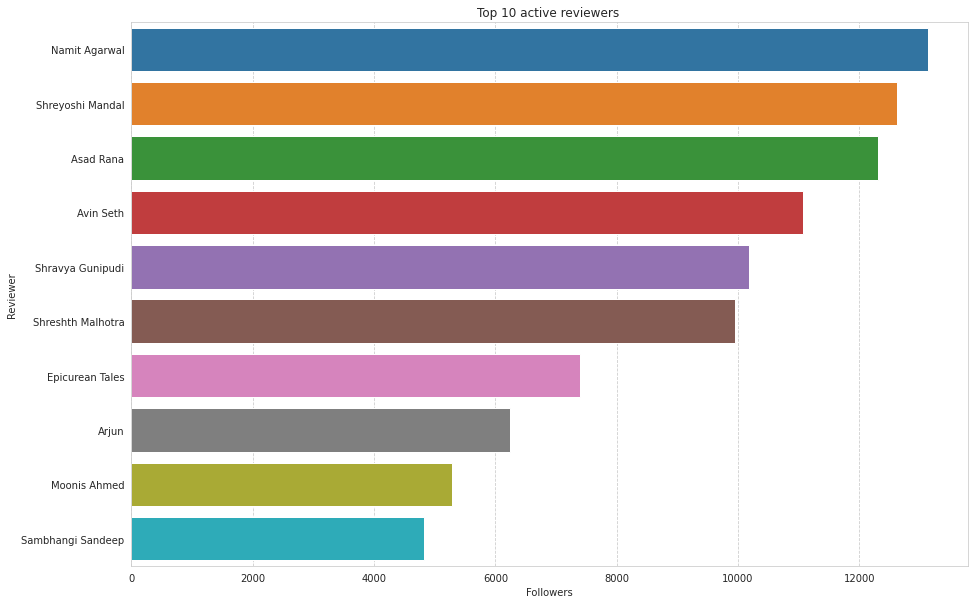

In [67]:
#The Top 10 Active Reviewers 
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (15,10))
sns.barplot(data=most_active_reviewer, x='Followers', y='Reviewer', order=most_active_reviewer.sort_values('Followers',ascending=False).Reviewer[:10])
plt.title('Top 10 active reviewers ')

##**Timing**

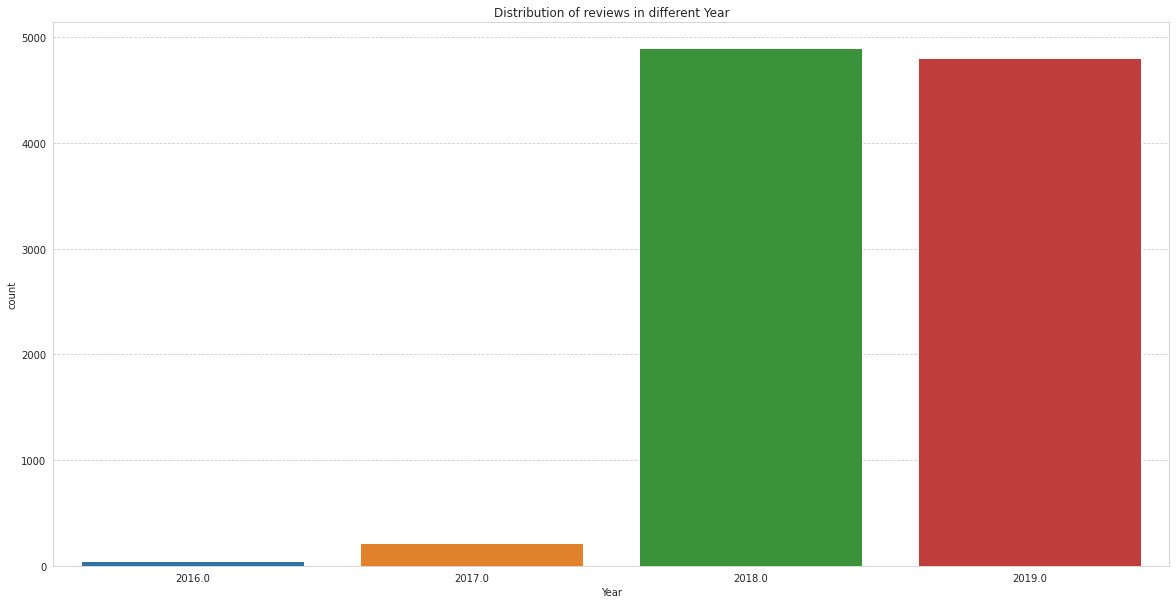

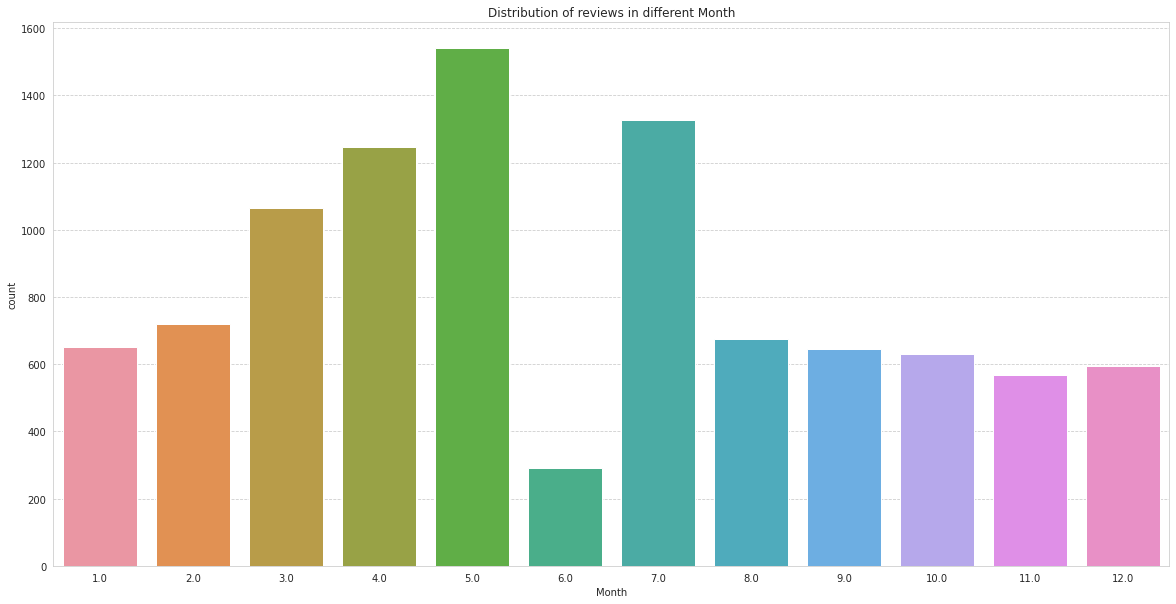

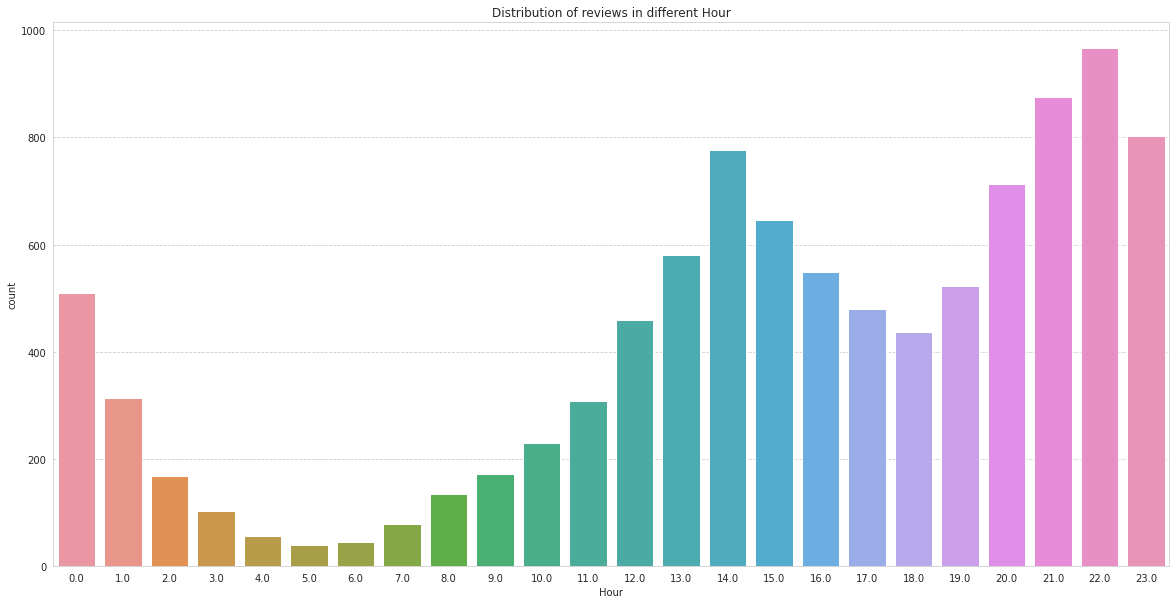

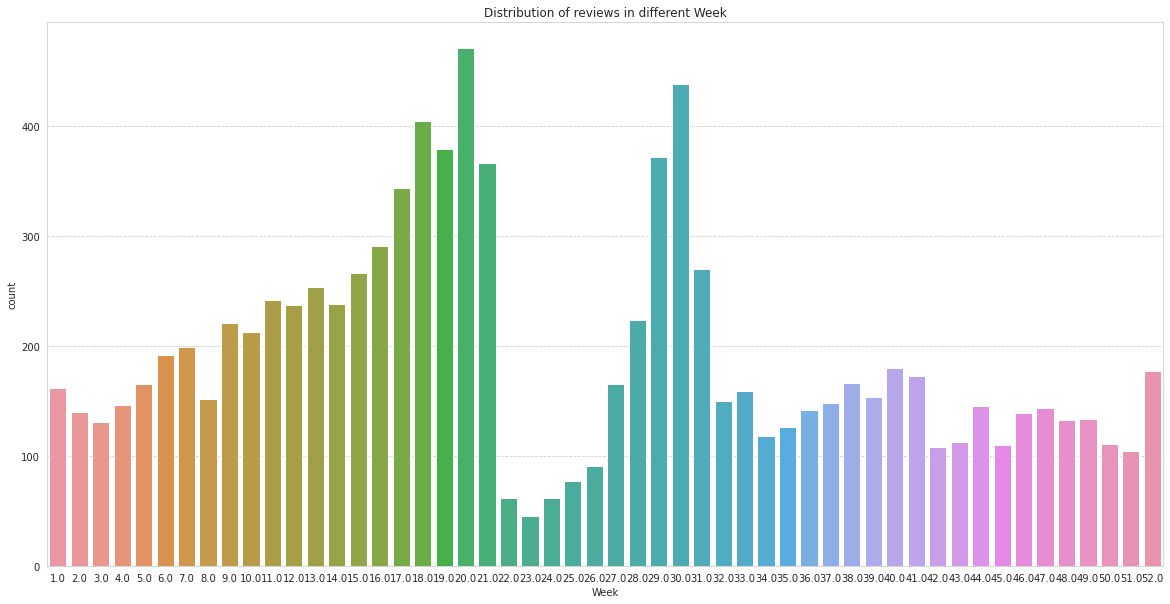

In [68]:
# Visualizing the time feature
time_list = ['Year','Month','Hour','Week']
for i in time_list:
  figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (20,10))
  sns.countplot(data=zomato_reviews_df, x=i)
  plt.title(f"Distribution of reviews in different {i}")

##**EDA Findings:**

*   The collage-Hyatt Hyderbad Gachibowli  is the most expensive restaurant available and the most affordable restaurant for the customers are the Amul and Mohammedia Shawarma.

*   The North Indian Cuisine is one of the cuisine highly in demand  followed by Chinese Cuisine and the least in demand cuisines are Wraps and Mexican. 

*   The most expensive Cuisine is the Modern India cuisine which cost around 2000 rupees and the least expensive item available at a cost of 200 rupees is the Mithai .

*   The Beyond Flavours Restaurant is  the only restaurant with six different variety of cuisines available.

*   Great Buffet is one of the most common Tags given to the zomato restaurants with nearly more than 40 restaurants. 


*   The Restaurant with the highest rating of nearly 4.8 and good reviews is the AB's Absolute Barbecues. On the contrary, the restaurant with worst reviews and rating is the Hotel Zara Hifi with a rating less than 2.5.


*   Anvesh Choudhary is one of the top reviewer based on number of reviews given and Foodporn is the reviewer who has given highest rating.


*   Namit Aggarwal is one of the active reviewer based on number of followers and ratings provided. He has an followers more than 12000 ,so we can consider his reviews with utmost importance for sure.

*   Distribution of reviews based on different months shows that there is a progressive shift in number of reviews from the month of Jan to May ,thereafter a sudden dip in the number of reviews in the month of June.It may be possibly happened due to some internal technical glicth in the zomato site because of which they may not able to collect reviews from the customers end.

*   Distribution of reviews based on different hours in a day shows us that the most of the reviews been given during afternoon time between 12-16 hrs,hence we can say mostly during lunch hours we can see high number of demand from customer end.

*   We are having the distribution of reviews from the year 2016 to 2019 in our dataset and the year 2018 has gained the highest number of reviews followed by the year 2019.









#**Text Preprocessing**

To prepare the text data for the model building we perform text preprocessing. It is the very first step of NLP projects. Some of the preprocessing steps are:

Removing punctuations like . , ! $( ) * % @

Removing URLs

Removing Stop words

Lower casing

Tokenization


Lemmatization

In [69]:
# storing reviews in a variable for data processing
reviews = zomato_reviews_df['Review']

In [70]:
reviews

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9959    Madhumathi Mahajan Well to start with nice cou...
9960    This place has never disappointed us.. The foo...
9961    Bad rating is mainly because of "Chicken Bone ...
9962    I personally love and prefer Chinese Food. Had...
9963    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [71]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 8.6 MB/s 
     |████████████████████████████████| 110 kB 57.6 MB/s 


In [72]:
#download small spacy model
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-13 23:13:36.809547: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 1.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [73]:
#Importing spacy advanced nlp library to get the stop words
import spacy
nlp = spacy.load('en_core_web_sm')
# Print the set of spaCy's default stop words and adding common words of data set
print(nlp.Defaults.stop_words)
print(nlp.vocab['-PRON-'].is_stop)

{'now', 'amongst', 'thereupon', 'here', 'somewhere', 'perhaps', 'wherein', 'from', 'throughout', 'these', 'can', "'ve", "'d", 'call', 'please', 'anyhow', 'much', 'moreover', 'together', 'ourselves', 'why', 'does', '‘ll', 'who', 'within', 'he', 'besides', 'thence', 'latterly', 'am', 'had', 'her', 'whose', 'under', 'herein', 'wherever', 'thus', 'they', 'becomes', 'full', 'done', 'too', 'keep', 'somehow', 'whoever', 'afterwards', 'we', 'any', 'unless', 'put', 'own', "'m", 'both', 'sometimes', 'per', 'nine', 'ten', 'could', 'about', 'the', 'toward', 'side', 'quite', 'using', 'its', "'ll", 'mostly', 'might', 'forty', '‘re', 'few', 'those', 'becoming', 'two', 'become', 'has', 'bottom', '’ve', 'no', 'yourself', 'herself', 'however', 'whereupon', 'still', '‘m', 'i', 'a', 'get', 'if', "'re", 'whereafter', 'because', 'did', 'other', '‘ve', 'rather', 'up', 'name', 'thereby', 'third', 'show', "'s", 'used', 'so', 'often', 'former', 'his', 'there', 'that', 'as', 'him', 'less', 'seems', 'yourselves',

In [74]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('-PRON-')

# Set the stop_word tag on the lexeme
nlp.vocab['-PRON-'].is_stop = True
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('pron')

# Set the stop_word tag on the lexeme
nlp.vocab['pron'].is_stop = True
# storing nlp stop words in a list
stop_word_list=list(nlp.Defaults.stop_words)
stop_word_list

['now',
 'amongst',
 'thereupon',
 'here',
 'somewhere',
 'perhaps',
 'wherein',
 'from',
 'throughout',
 'these',
 'can',
 "'ve",
 "'d",
 'call',
 'please',
 'anyhow',
 'much',
 'moreover',
 'together',
 'ourselves',
 'why',
 'does',
 '‘ll',
 'who',
 'within',
 'he',
 'besides',
 'thence',
 'latterly',
 'am',
 'had',
 'her',
 'whose',
 'under',
 'herein',
 'wherever',
 'thus',
 'they',
 'becomes',
 'full',
 'done',
 'too',
 'keep',
 'somehow',
 'whoever',
 'afterwards',
 'we',
 'any',
 'unless',
 'put',
 'own',
 "'m",
 'both',
 'sometimes',
 'per',
 'nine',
 'ten',
 'could',
 'about',
 'the',
 'toward',
 'side',
 'quite',
 'using',
 'its',
 "'ll",
 'mostly',
 'might',
 'forty',
 '‘re',
 'few',
 'those',
 'becoming',
 'two',
 'become',
 'has',
 'bottom',
 '’ve',
 'no',
 'yourself',
 'herself',
 'however',
 'whereupon',
 'still',
 '‘m',
 'i',
 'a',
 'get',
 'if',
 "'re",
 'whereafter',
 'because',
 'did',
 'other',
 '‘ve',
 'rather',
 'up',
 'name',
 'thereby',
 'third',
 'show',
 "'s",

In [75]:
# functions used for text preprocessing

def lower_case(text):
  '''convert the text into lower case 
  '''
  text=[x.lower() for x in text]
  return text

import string
def remove_punctuation (text):
  '''remove punctuation from the the list of strings
  '''
  text = [''.join(p for p in s if p not in string.punctuation) for s in text]
  return text

import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

def remove_all_extra_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text
  
import string
ascii_chars = set(string.printable) 
def remove_non_ascii_prinatble_from_list(list_of_words):
  '''removes non ascii charaters from text
  '''
  return [word for word in list_of_words 
            if all(char in ascii_chars for char in word)]

import contractions
def remove_contrations(text):
  '''remove shortent  words 
  '''
  for index,x in enumerate(text):
    text[index] = contractions.fix(x)
  return text



def remove_stop_words (text):
  text_2=[]
  for x in reviews:
    text_1=[]
    for i in x.split(' '):
      if i not in stop_word_list:
        text_1.append(i)
    text_2.append(' '.join(text_1))
  return text_2

def lemmatization_(text):
  '''converting to root words
  '''
  for index,x in enumerate(text):
    doc = nlp(x)  
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)

  return text

def legit_review(review):
  "function to remove words greater than 40 and less than 2"
  final_review_list = []
  for sent in review:
    wor = []
    for word in sent.split(' '):
      if len(word)>2 and len(word)<=40:
        wor.append(word)
    final_review_list.append(' '.join(wor))

  return final_review_list



In [76]:
#applying the function on the reviews data
reviews=lower_case(reviews)
reviews=remove_punctuation(reviews)
reviews=remove_non_leters(reviews)
reviews=remove_all_extra_spaces(reviews)
reviews=remove_non_ascii_prinatble_from_list(reviews)
reviews=remove_contrations(reviews)
reviews=remove_stop_words(reviews)
reviews=lemmatization_(reviews)
reviews =legit_review(reviews)

In [77]:
reviews

['ambience good food good saturday lunch cost effective good place sate brunch chill friend parent waiter souman das courteous helpful',
 'ambience good pleasant evening service prompt food good good experience souman das kudo service',
 'try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta music background amazing',
 'soumen das arun great guy behavior sincerety good food course like visit place',
 'food goodwe order kodi drumstick basket mutton biryani good thank pradeep serve enjoy ambience good',
 'ambiance good service good food apradeecp subro good service food good papiya good hostess caption good star restaurant',
 'nice place ambience different food order tasty service gud worth visit reasonable visit place',
 'reading review finally visit placeambience good come food crispy corn nice tawa fish basket biryani disappoint biryani flattering claim staff polite prompt especially pradeep suman',
 'excellent food specially like spicy

In [78]:
#toal no. of words in reviews
all_words=' '.join(reviews)
len(all_words)

1590360

In [79]:
# storing the reviews in a feature of df
zomato_reviews_df['Reviews']=reviews
zomato_reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Hour,Week,Month,Year,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,15.0,21.0,5.0,2019.0,ambience good food good saturday lunch cost ef...,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,14.0,21.0,5.0,2019.0,ambience good pleasant evening service prompt ...,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,22.0,21.0,5.0,2019.0,try great food great ambience thnx service pra...,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,22.0,21.0,5.0,2019.0,soumen das arun great guy behavior sincerety g...,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,21.0,21.0,5.0,2019.0,food goodwe order kodi drumstick basket mutton...,2.0


In [80]:
# droping the old review  column
zomato_reviews_df=zomato_reviews_df.drop('Review',axis=1)

In [81]:
zomato_reviews_df.head()

,Restaurant,Reviewer,Rating,Time,Pictures,Hour,Week,Month,Year,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,5.0,2019-05-25 15:54:00,0.0,15.0,21.0,5.0,2019.0,ambience good food good saturday lunch cost ef...,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,5.0,2019-05-25 14:20:00,0.0,14.0,21.0,5.0,2019.0,ambience good pleasant evening service prompt ...,2.0
2,Beyond Flavours,Ashok Shekhawat,5.0,2019-05-24 22:54:00,0.0,22.0,21.0,5.0,2019.0,try great food great ambience thnx service pra...,3.0
3,Beyond Flavours,Swapnil Sarkar,5.0,2019-05-24 22:11:00,0.0,22.0,21.0,5.0,2019.0,soumen das arun great guy behavior sincerety g...,1.0
4,Beyond Flavours,Dileep,5.0,2019-05-24 21:37:00,0.0,21.0,21.0,5.0,2019.0,food goodwe order kodi drumstick basket mutton...,2.0


#**Sentimental  Analysis** (Unsupervised)

In [82]:
#storing reviews in  reviews_df
reviews_df = zomato_reviews_df['Reviews']
reviews_df

0       ambience good food good saturday lunch cost ef...
1       ambience good pleasant evening service prompt ...
2       try great food great ambience thnx service pra...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe order kodi drumstick basket mutton...
                              ...                        
9959    madhumathi mahajan start nice courteous server...
9960    place disappoint food courteous staff serene a...
9961    bad rating mainly chicken bone find veg food a...
9962    personally love prefer chinese food couple tim...
9963    check try delicious chinese food see nonveg lu...
Name: Reviews, Length: 9954, dtype: object

### First we develop a list of the top words used by reviewers in reviews textual data, giving us a glimpse into the core vocabulary of the source data. Stop words are omitted here to avoid any trivial conjunctions, prepositions, etc.

In [83]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

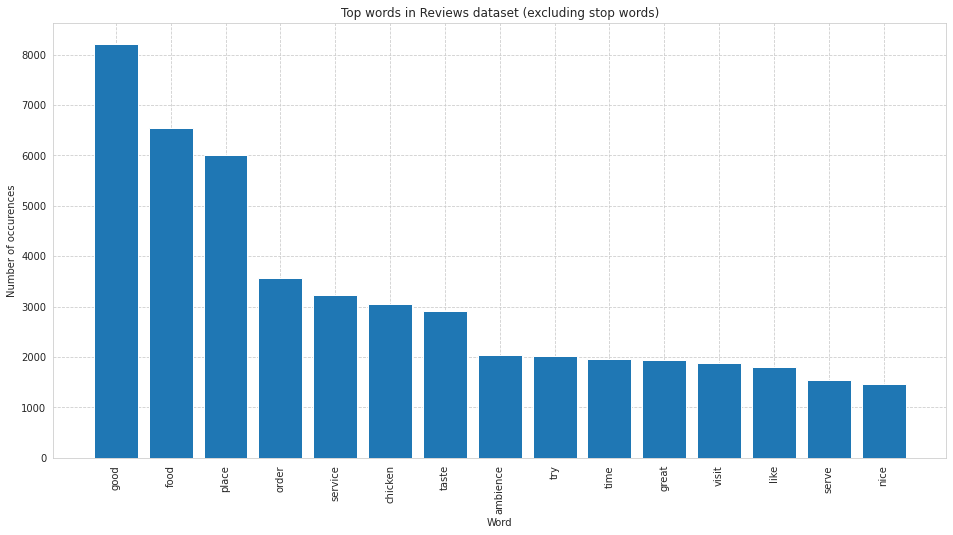

In [84]:
#Visualizing the top words using a barplot
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reviews_df)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in Reviews dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

## <b> Topic Modelling </b>

### We now apply a clustering algorithm to the reviews corpus in order to study the topic focus of reviews, as well as how it has evolved through time. To do so, we first experiment with a small subsample of the dataset in order to determine which of the two potential clustering algorithms is most appropriate – once this has been ascertained, we can then scale up to a larger portion of the available data.

## <b>Preprocessing</b>


### The only preprocessing step required in our case is feature construction, where we take the sample of text headlines and represent them in some tractable feature space. In practice, this simply means converting each string to a numerical vector. This can be done using the ```CountVectorizer``` object from SKLearn, which yields an $n×K$ document-term matrix where $K$ is the number of distinct words  across the $n$ headlines in our sample (less stop words and with a limit of ```max_features```).

In [85]:
# setting tokens by TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(stop_words=stop_word_list)
small_text_sample = reviews_df.sample(n=5000, random_state=0).values

print('Headline before vectorization: {}'.format(small_text_sample[123]))

transformed_reviews=tfidf_vectorizer.fit_transform(reviews_df)

print('Headline after vectorization: \n{}'.format(transformed_reviews[123]))

Headline before vectorization: good
Headline after vectorization: 
  (0, 1870)	0.4384733945188953
  (0, 3795)	0.20350502549344712
  (0, 1552)	0.24277925920660517
  (0, 9592)	0.22772612647473628
  (0, 11213)	0.36496723519555446
  (0, 1683)	0.22135514356948255
  (0, 4778)	0.1371690531540028
  (0, 2379)	0.09736875492977784
  (0, 1484)	0.15898801663372658
  (0, 1064)	0.23511596736195883
  (0, 14014)	0.09873591853492013
  (0, 7414)	0.15594752046250313
  (0, 12818)	0.14989531747591958
  (0, 1534)	0.4906133931471118
  (0, 9561)	0.08256370411036323
  (0, 7752)	0.1029689819130416
  (0, 4558)	0.11226752556735832
  (0, 10342)	0.06892961365807115
  (0, 3008)	0.18016862144379228


### Thus we have our (very high-rank and sparse) training data,  ```small_document_term_matrix```, and can now actually implement a clustering algorithm. Our choice will be Latent Dirichlet Allocation. IT  will take our document-term matrix as input and yield an $n \times N$ topic matrix as output, where $N$ is the number of topic categories (which we supply as a parameter).

## <b>Latent Dirichlet Allocation</b>

### LDA is a generative probabilistic process, designed with the specific goal of uncovering latent topic structure in text corpora.

In [86]:
#importing lda library
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

In [87]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(5,10))}

# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(transformed_reviews)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(transformed_reviews))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -81043.03939327397
LDA model Perplexity on train data 7160.240870368231


In [88]:
best_lda_model.components_

array([[0.20001654, 0.44732184, 0.20004219, ..., 0.20006624, 0.20002143,
        0.20004745],
       [0.45048418, 0.20003506, 0.20008331, ..., 0.78681025, 0.20004247,
        0.20001587],
       [0.20257436, 0.20073243, 0.30428598, ..., 0.35024121, 0.61064268,
        0.200002  ],
       [0.2000304 , 0.2000325 , 0.20007678, ..., 0.2014626 , 0.20003966,
        0.38290579],
       [0.20003397, 0.20003616, 0.20008493, ..., 0.20013771, 0.20004375,
        0.20001624]])

In [89]:
# checking for top 15 words in each topic
for index,topic in enumerate(best_lda_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['indian', 'chocolate', 'ambience', 'amazing', 'love', 'coffee', 'try', 'visit', 'cake', 'taste', 'great', 'place', 'service', 'food', 'good']


THE TOP 15 WORDS FOR TOPIC #1
['behaviour', 'credit', 'goid', 'worse', 'loved', 'sarvice', 'oil', 'food', 'verry', 'awsome', 'poor', 'thank', 'spicy', 'super', 'nice']


THE TOP 15 WORDS FOR TOPIC #2
['like', 'try', 'visit', 'time', 'biryani', 'ambience', 'great', 'bad', 'taste', 'service', 'chicken', 'order', 'place', 'good', 'food']


THE TOP 15 WORDS FOR TOPIC #3
['late', 'wrong', 'kurkure', 'order', 'low', 'shake', 'momos', 'good', 'quick', 'oily', 'boy', 'receive', 'quantity', 'time', 'delivery']


THE TOP 15 WORDS FOR TOPIC #4
['kodi', 'delivary', 'qty', 'delivery', 'service', 'incomplete', 'gari', 'raju', 'time', 'ghouse', 'shah', 'gud', 'fast', 'deliver', 'excellent']




### Once again, we take the $\arg \max$ of each entry in the topic matrix to obtain the predicted topic category for each headline. These topic categories can then be characterised by their most frequent words.


In [90]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 6.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=d765c2bfa0e969187297bae7e93421a16718f77e8d393ee7f15d41fb38146587
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=d69d25ce3f27e21b61a593e3f63ec836cdb11cda20c0c7688aa4ca17f1479ddc
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [91]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


In [92]:
# ploting the clusters top 30 terms 
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, transformed_reviews,tfidf_vectorizer,mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  71.694204
0       51.163364 -159.968018       2        1  11.100193
3      -73.144554   21.523815       3        1   6.129213
1      -66.410133 -110.606438       4        1   5.606853
4       54.417324   12.443444       5        1   5.469537, topic_info=            Term        Freq       Total Category  logprob  loglift
5618        good  618.000000  618.000000  Default  30.0000  30.0000
9105        nice  173.000000  173.000000  Default  29.0000  29.0000
3540    delivery   99.000000   99.000000  Default  28.0000  28.0000
14014       time  174.000000  174.000000  Default  27.0000  27.0000
4466   excellent   76.000000   76.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
14765     vepudu    1.159637    4.657971   Topic5  -7.4574   1.5155
12155    service    1.948311  240.696141   Topic5  -6.9386  -1.9106
3540    delivery    1.702764   99.068700   Topic5  -7.0733  -1.1576
7613        late    1.216461   37.403984   Topic5  -7.4096  -0.5199
5303       fully    1.015708    8.466580   Topic5  -7.5899   0.7854

[307 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
219        4  0.574707     agen
221        3  0.466571    agent
306        4  0.609549    allah
389        1  0.871255  amazing
389        2  0.124465  amazing
...      ...       ...      ...
15284      1  0.776597    wrong
15284      3  0.194149    wrong
15287      5  0.559162    wrost
15376      4  0.578583     yuck
15443      1  0.984620   zomato

[385 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2, 5])

In [93]:
#creating a copy of zomato review df
zomato_transformed_reviews_df = zomato_reviews_df.copy()

In [94]:
# predicting the sentiments and storing in a feature
topic_results = best_lda_model.transform(transformed_reviews)
zomato_transformed_reviews_df ['sentiments']=topic_results.argmax(axis=1)
zomato_transformed_reviews_df .head()

,Restaurant,Reviewer,Rating,Time,Pictures,Hour,Week,Month,Year,Reviews,Followers,sentiments
0,Beyond Flavours,Rusha Chakraborty,5.0,2019-05-25 15:54:00,0.0,15.0,21.0,5.0,2019.0,ambience good food good saturday lunch cost ef...,2.0,2
1,Beyond Flavours,Anusha Tirumalaneedi,5.0,2019-05-25 14:20:00,0.0,14.0,21.0,5.0,2019.0,ambience good pleasant evening service prompt ...,2.0,2
2,Beyond Flavours,Ashok Shekhawat,5.0,2019-05-24 22:54:00,0.0,22.0,21.0,5.0,2019.0,try great food great ambience thnx service pra...,3.0,2
3,Beyond Flavours,Swapnil Sarkar,5.0,2019-05-24 22:11:00,0.0,22.0,21.0,5.0,2019.0,soumen das arun great guy behavior sincerety g...,1.0,2
4,Beyond Flavours,Dileep,5.0,2019-05-24 21:37:00,0.0,21.0,21.0,5.0,2019.0,food goodwe order kodi drumstick basket mutton...,2.0,2


In [95]:
# finding ratings value counts given to sentiment 0
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==0 ]['Rating'].value_counts()

5.0    684
4.0    229
3.0     91
1.0     69
2.0     31
4.5      8
3.5      5
2.5      2
Name: Rating, dtype: int64

In [96]:
# finding ratings value counts given to sentiment 1
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==1 ]['Rating'].value_counts()

5.0    130
1.0     28
4.0     27
3.0     16
2.0     10
Name: Rating, dtype: int64

In [97]:
# finding ratings value counts given to sentiment 2
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==2 ]['Rating'].value_counts()

5.0    2721
4.0    2078
1.0    1550
3.0    1059
2.0     619
4.5      61
3.5      42
2.5      17
1.5       9
Name: Rating, dtype: int64

In [98]:
# finding ratings value counts given to sentiment 3
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==3 ]['Rating'].value_counts()

5.0    154
1.0     64
4.0     26
3.0     22
2.0     19
Name: Rating, dtype: int64

In [99]:
# finding ratings value counts given to sentiment 4
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==4 ]['Rating'].value_counts()

5.0    137
1.0     24
4.0     13
2.0      5
3.0      4
Name: Rating, dtype: int64

##**Non-Negative Matrix Factorization**
Non-negative Matrix Factorization (NNMF) or the positive matrix analysis is another NLP technique for topic modeling. NNMF differs from LDA because it depends on creating two matrices from random numbers. The first matrix represents the relationship between words and topic while the second matrix represents the relationship between the topic and documents that forms the mathematical basis for categorizing texts as happened in LDA.NNMF is also used in image processing applications.NNMF is faster and more accurate than LDA that’s can be simply explained because LDA depends on the frequency of words and the topics were selected according to how much these words were presented.However NNMF selects random correlation values between words and topics and training is run based in words exist or not which enable for adjusting weights as the training repeated. NNMF is more favorable for its dimension reduction.

In [100]:
#importing nmf library
from sklearn.decomposition import NMF

In [101]:
#fitting the nmf model in transformed reviews
nmf_model = NMF(n_components=5,random_state=42)
nmf_model.fit(transformed_reviews)

NMF(n_components=5, random_state=42)

We can view the words in this article through ’tfidf.get_ featur_names’ and pass the index number of the word. So the top 15 words in a topic can be viewed through the ’argsort’ function which sorts values from least to highest. For sure we need to to iterate in tuple, therefore we will use enumerate function on NMF.components where components are the topics in our corpus as follows:

In [102]:
# top most frequnt word used in each topic
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['boy', 'polite', 'test', 'quantity', 'price', 'quality', 'ambiance', 'spicy', 'ambience', 'burger', 'job', 'food', 'taste', 'service', 'good']


THE TOP 15 WORDS FOR TOPIC #1
['excellent', 'serve', 'try', 'friend', 'amazing', 'love', 'time', 'awesome', 'staff', 'visit', 'ambience', 'great', 'service', 'place', 'food']


THE TOP 15 WORDS FOR TOPIC #2
['music', 'sarvice', 'ambiance', 'service', 'overall', 'hangout', 'family', 'thank', 'enjoy', 'staff', 'ambience', 'place', 'friend', 'friendly', 'nice']


THE TOP 15 WORDS FOR TOPIC #3
['zomato', 'person', 'thank', 'awesome', 'guy', 'excellent', 'super', 'order', 'boy', 'quick', 'late', 'deliver', 'fast', 'time', 'delivery']


THE TOP 15 WORDS FOR TOPIC #4
['piece', 'spicy', 'try', 'paneer', 'veg', 'restaurant', 'like', 'quality', 'rice', 'quantity', 'bad', 'biryani', 'taste', 'order', 'chicken']




So we can see above, we got words in the first topic like price, taste,spicy, quality and service which suggests that this topic is about the food attributes while in fourth topic  for example, the most valuable words are ‘delivery, fast, guy, excellent,'late’ and that suggest that topic 4 is about delivery service.

In [103]:
#applying nmf model to transformed reviews
topic_result = nmf_model.transform(transformed_reviews)

In [104]:
#storing nmf topic result as sentiments feature in zomato transformed reviews
zomato_transformed_reviews_df['sentiments']=topic_result.argmax(axis=1)

In [105]:
# finding ratings value counts given to sentiment 0
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==0 ]['Rating'].value_counts()

5.0    648
4.0    268
3.0    109
1.0     52
2.0     50
4.5      7
3.5      3
2.5      1
Name: Rating, dtype: int64

In [106]:
# finding ratings value counts given to sentiment 1
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==1 ]['Rating'].value_counts()

5.0    2014
4.0    1192
3.0     519
1.0     498
2.0     248
4.5      35
3.5      14
2.5      11
1.5       1
Name: Rating, dtype: int64

In [107]:
# finding ratings value counts given to sentiment 2
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==2 ]['Rating'].value_counts()

5.0    341
4.0    167
3.0     57
1.0      9
2.0      6
4.5      5
3.5      3
1.5      1
Name: Rating, dtype: int64

In [108]:
# finding ratings value counts given to sentiment 3
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==3 ]['Rating'].value_counts()

5.0    288
1.0     99
4.0     65
3.0     36
2.0     24
4.5      3
3.5      2
2.5      1
Name: Rating, dtype: int64

In [109]:
# finding ratings value counts given to sentiment 4
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']==4 ]['Rating'].value_counts()

1.0    1077
4.0     681
5.0     535
3.0     471
2.0     356
3.5      25
4.5      19
1.5       7
2.5       6
Name: Rating, dtype: int64

In [110]:
# classified sentiments feature into positive and negative class
zomato_transformed_reviews_df['sentiments']=zomato_transformed_reviews_df['sentiments'].apply( lambda x : 'negative' if x==4 or x==3 else 'positive')

In [111]:
# finding ratings value counts given to negative sentiments
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']=='negative']["Rating"].value_counts()

1.0    1176
5.0     823
4.0     746
3.0     507
2.0     380
3.5      27
4.5      22
2.5       7
1.5       7
Name: Rating, dtype: int64

In [112]:
# finding ratings value counts given to positive sentiments
zomato_transformed_reviews_df[zomato_transformed_reviews_df['sentiments']=='positive']["Rating"].value_counts()

5.0    3003
4.0    1627
3.0     685
1.0     559
2.0     304
4.5      47
3.5      20
2.5      12
1.5       2
Name: Rating, dtype: int64

In [113]:
zomato_transformed_reviews_df.head()

,Restaurant,Reviewer,Rating,Time,Pictures,Hour,Week,Month,Year,Reviews,Followers,sentiments
0,Beyond Flavours,Rusha Chakraborty,5.0,2019-05-25 15:54:00,0.0,15.0,21.0,5.0,2019.0,ambience good food good saturday lunch cost ef...,2.0,positive
1,Beyond Flavours,Anusha Tirumalaneedi,5.0,2019-05-25 14:20:00,0.0,14.0,21.0,5.0,2019.0,ambience good pleasant evening service prompt ...,2.0,positive
2,Beyond Flavours,Ashok Shekhawat,5.0,2019-05-24 22:54:00,0.0,22.0,21.0,5.0,2019.0,try great food great ambience thnx service pra...,3.0,positive
3,Beyond Flavours,Swapnil Sarkar,5.0,2019-05-24 22:11:00,0.0,22.0,21.0,5.0,2019.0,soumen das arun great guy behavior sincerety g...,1.0,positive
4,Beyond Flavours,Dileep,5.0,2019-05-24 21:37:00,0.0,21.0,21.0,5.0,2019.0,food goodwe order kodi drumstick basket mutton...,2.0,positive


# **Sentiment Analysis** (Superviesd)


## **Feature Engineering for Sentimental Analysis**


In [114]:
#we will use zomato_review_dataset for this analysis
zomato_reviews_df.head()

,Restaurant,Reviewer,Rating,Time,Pictures,Hour,Week,Month,Year,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,5.0,2019-05-25 15:54:00,0.0,15.0,21.0,5.0,2019.0,ambience good food good saturday lunch cost ef...,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,5.0,2019-05-25 14:20:00,0.0,14.0,21.0,5.0,2019.0,ambience good pleasant evening service prompt ...,2.0
2,Beyond Flavours,Ashok Shekhawat,5.0,2019-05-24 22:54:00,0.0,22.0,21.0,5.0,2019.0,try great food great ambience thnx service pra...,3.0
3,Beyond Flavours,Swapnil Sarkar,5.0,2019-05-24 22:11:00,0.0,22.0,21.0,5.0,2019.0,soumen das arun great guy behavior sincerety g...,1.0
4,Beyond Flavours,Dileep,5.0,2019-05-24 21:37:00,0.0,21.0,21.0,5.0,2019.0,food goodwe order kodi drumstick basket mutton...,2.0


In [115]:
#Considered Rating and Reviews features  for our sentimental analysis
df_sentiment=zomato_reviews_df[['Rating','Reviews']]
df_sentiment

,Rating,Reviews
0,5.0,ambience good food good saturday lunch cost ef...
1,5.0,ambience good pleasant evening service prompt ...
2,5.0,try great food great ambience thnx service pra...
3,5.0,soumen das arun great guy behavior sincerety g...
4,5.0,food goodwe order kodi drumstick basket mutton...
...,...,...
9959,3.0,madhumathi mahajan start nice courteous server...
9960,4.5,place disappoint food courteous staff serene a...
9961,1.5,bad rating mainly chicken bone find veg food a...
9962,4.0,personally love prefer chinese food couple tim...


In [116]:
#used a function to convert the rating feature into binary values(0 and 1)
def rating_bin(rating):
  if rating >=3.5:
    return 1 
    # positive sentiment
  else:
    return 0
    # negative sentiment 

In [117]:
#new feature sentiment created using the rating_bin function
df_sentiment['Sentiment'] = df_sentiment['Rating'].apply(lambda x:rating_bin(x))
df_sentiment.head()

,Rating,Reviews,Sentiment
0,5.0,ambience good food good saturday lunch cost ef...,1
1,5.0,ambience good pleasant evening service prompt ...,1
2,5.0,try great food great ambience thnx service pra...,1
3,5.0,soumen das arun great guy behavior sincerety g...,1
4,5.0,food goodwe order kodi drumstick basket mutton...,1


In [118]:
df_sentiment.shape

(9954, 3)

In [119]:
# creating X and y varibles i.e independent and dependent variable
X = df_sentiment['Reviews']
y = df_sentiment['Sentiment']

In [120]:
# spliting the data into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=df_sentiment['Sentiment'])

In [121]:
# creating tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',min_df=0.01,max_df=0.95)
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [122]:
#Determining the shape of our review feature in train and test data
X_train.shape , X_test.shape

((7465, 349), (2489, 349))

In [123]:
# defining empty list to store the input of scores of models
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]



In [124]:
# making a function to train the model and evaluate the model
def model_eval (model,X_test,X_train,y_test,y_train, best_parameter=True, best_score=True,random_state=10):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

 
  #training the model
  model.fit(X_train,y_train)
  
  # finding the best parameters of the model if any 

  if best_parameter==True:
    # using try except method to avoid any error
    try:
      print("The best parameters found out to be :" ,model.best_params_)
    except:
      pass

  # finding best score of the model

  if best_score==True:
    try:
      print(" \nwhere negative mean squared error is: ", model.best_score_,'\n')
    except:
      pass


  #predicting the values of y from x via model

  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  def score (actual,predicted,append=True):
    '''
    calcuating different evaluation matrix of the model
    '''
    # calculating accuracy score
    accuracy = accuracy_score(actual,predicted)
    # calculating precision score
    precision = precision_score(actual,predicted)
    # calculating recall score
    recall = recall_score(actual,predicted)
    # calculating f1_score score
    f1 = f1_score(actual,predicted)
    # calculating roc_auc_score score
    roc= roc_auc_score(actual,predicted)
    
    # printing all the scores
    print("\tThe accuracy is ", accuracy)
    print("\tThe precision is ", precision)
    print("\tThe recall is ", recall)
    print("\tThe f1 is ", f1)
    print('\tthe auc  is ',roc,'\n')
    print('\t\t\t\tclassification report\n','*'*50,'\n',classification_report(actual,predicted))
    

    # uploading all the score of the matrix  in the list 
    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass
# printing the train and test score
  # for train set
  print('train score')
  print('*'*50)
  score(y_train,y_pred_train,False)
  print('\n')
  # for test set
  print('test score')
  print('*'*50)
  score(y_test,y_pred_test)



## **Logisitic Regression**


In [125]:
from sklearn.linear_model import LogisticRegression
# creating LogisticRegression model
log_reg = LogisticRegression()

In [126]:
# finding the best parameters for LogisticRegression by gridsearchcv
param_dict = {'C': [0.1,1,10,100,1],'penalty': ['l1', 'l2'],'max_iter':[1000]} 
model_1 = GridSearchCV(log_reg, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

In [127]:
# training and evaluating the model
model_eval(model_1, X_test, X_train, y_test, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters found out to be : {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}
 
where negative mean squared error is:  0.9567140737572346 

train score
**************************************************
	The accuracy is  0.848760884125921
	The precision is  0.8310996879015972
	The recall is  0.9558699324324325
	The f1 is  0.8891289403908476
	the auc  is  0.8093750541605181 

				classification report
 ************************************************** 
               precision    recall  f1-score   support

           0       0.90      0.66      0.76      2729
           1       0.83      0.96      0.89      4736

    accuracy                           0.85      7465
   macro avg       0.86      0.81      0.83      7465
weighted avg       0.85      0.85      0.84      7465



test score
**************************************************
	The accuracy is  0.8352752109280835
	The precision is  0.8231066887783306
	The reca


## **Desision Tree**


In [128]:
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
model_2 = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=50,criterion='entropy')

# training and evaluating the DecisionTree
model_eval(model_2,X_test, X_train, y_test, y_train)

train score
**************************************************
	The accuracy is  0.7923643670462157
	The precision is  0.8706375058166589
	The recall is  0.7901182432432432
	The f1 is  0.828425946424618
	the auc  is  0.7931903052053519 

				classification report
 ************************************************** 
               precision    recall  f1-score   support

           0       0.69      0.80      0.74      2729
           1       0.87      0.79      0.83      4736

    accuracy                           0.79      7465
   macro avg       0.78      0.79      0.78      7465
weighted avg       0.80      0.79      0.80      7465



test score
**************************************************
	The accuracy is  0.7633587786259542
	The precision is  0.8481012658227848
	The recall is  0.7637745408486384
	The f1 is  0.8037320893035654
	the auc  is  0.7632059517430005 

				classification report
 ************************************************** 
               precision    recall  


## **Random forest**


In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
# creating RandomForestRegressor model
rfc=RandomForestClassifier()

In [131]:
# finding the best parameters for knn_model by gridsearchcv
grid_values_rf = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
model_3 = GridSearchCV(estimator=rfc,param_grid = grid_values_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)

In [132]:
# training and evaluating the Random Forest Regressor
model_eval(model_3,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 150}
 
where negative mean squared error is:  0.9886035764516776 

train score
**************************************************
	The accuracy is  0.7810365608678184
	The precision is  0.7452561669829222
	The recall is  0.9949335022165928
	The f1 is  0.8521833468944943
	the auc  is  0.7024118060533513 

				classification report
 ************************************************** 
               precision    recall  f1-score   support

           0       0.98      0.41      0.58       910
           1       0.75      0.99      0.85      1579

    accuracy                           0.78      2489
   macro avg       0.86      0.70      0.72      2489
weighted avg       0.83      0.78      0.75      2489



test score
**************************************************
	The accuracy is  0.7574012056262559
	The precision is  0.7262881015


##**XGboost**


In [133]:
from xgboost import XGBClassifier

In [134]:
xgb=XGBClassifier()

In [135]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
model_4=GridSearchCV(estimator=xgb,param_grid=xgb_param,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [136]:
# training and evaluating the xgb_grid
model_eval(model_4,X_test, X_train, y_test, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 150}
 
where negative mean squared error is:  0.906038084887383 

train score
**************************************************
	The accuracy is  0.9636972538513061
	The precision is  0.9734888653234358
	The recall is  0.9691722972972973
	The f1 is  0.9713257856311501
	the auc  is  0.9616839866845592 

				classification report
 ************************************************** 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2729
           1       0.97      0.97      0.97      4736

    accuracy                           0.96      7465
   macro avg       0.96      0.96      0.96      7465
weighted avg       0.96      0.96      0.96      7465



test score
**************************************************
	The accuracy is  0.8453194053836882
	The precision is  0.8626974483


## **LightGBM**


In [137]:
import lightgbm as lgb

In [138]:
lgbm=lgb.LGBMClassifier()

In [139]:
# finding the best parameters for LightGBM by gridsearchcv
lgbm_para={'n_estimators': [100,125,150],'max_depth': [15,20,25]}
model_5=GridSearchCV(estimator=lgbm,param_grid=lgbm_para,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [140]:
# training and evaluating the lgbr_grid
model_eval(model_5,X_test, X_train, y_test, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best parameters found out to be : {'max_depth': 20, 'n_estimators': 125}
 
where negative mean squared error is:  0.9022372750932243 

train score
**************************************************
	The accuracy is  0.9395847287340924
	The precision is  0.9490672814923496
	The recall is  0.956081081081081
	The f1 is  0.9525612706426843
	the auc  is  0.9335187376823507 

				classification report
 ************************************************** 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      2729
           1       0.95      0.96      0.95      4736

    accuracy                           0.94      7465
   macro avg       0.94      0.93      0.93      7465
weighted avg       0.94      0.94      0.94      7465



test score
**************************************************
	The accuracy is  0.844917637605464
	The precision is  0.8675292667898953
	The recall is  0.


## **Model Summary**


In [141]:
#creating dictionary to store all the metrices 
model_result={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score}

In [142]:
# list of all models
model_names=['Logistic Regrestion','Desision Tree','Random forest','XGboost','LightGBM',]

In [143]:
# converting dictionary to dataframe
models_result_df=pd.DataFrame.from_dict(model_result,orient="index",columns=model_names)

In [144]:
models_result_df=models_result_df.transpose().reset_index().rename(columns={'index':'Models'})

In [145]:
models_result_df

,Models,accuracy,precision,recall,f1,roc_auc
0,Logistic Regrestion,0.835275,0.823107,0.943002,0.878985,0.795677
1,Desision Tree,0.763359,0.848101,0.763775,0.803732,0.763206
2,Random forest,0.757401,0.726288,0.991132,0.838289,0.671454
3,XGboost,0.845319,0.862697,0.899303,0.880620,0.825476
4,LightGBM,0.844918,0.867529,0.891704,0.879450,0.827720


## **ROC curve for all the models**


In [146]:
# finding the best parameters for all the models
log_reg_best=model_1.best_estimator_
rfc_best=model_3.best_estimator_
xgbc_best=model_4.best_estimator_
lgbc_best=model_5.best_estimator_


In [147]:
# predicting the sentiment by all models

y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_dtc = model_2.predict_proba(X_test)[::,1]
y_preds_proba_rfc = rfc_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]
y_preds_proba_lgbc = lgbc_best.predict_proba(X_test)[::,1]

In [148]:
from sklearn.metrics import roc_curve

In [149]:
classifiers_proba = [(log_reg_best, y_preds_proba_lr), 
                    (model_2, y_preds_proba_dtc), 
                    (rfc_best, y_preds_proba_rfc),
                    (xgbc_best, y_preds_proba_xgbc),
                    (lgbc_best, y_preds_proba_lgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

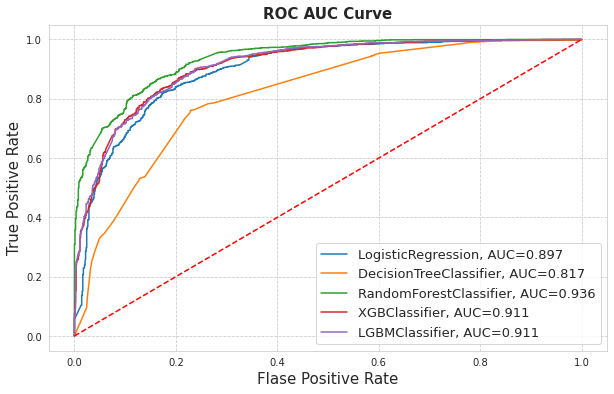

In [150]:
# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label= "{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
             

plt.plot([0,1], [0,1],'r--')

plt.xlabel("Flase Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#**Clustering**

Clustering is done on the basis of similarities between the data points. The similarities are understood by how closely distanced these points are. The following are some hypotheses that can be generated by finding some similarities in the visualized data:

Restaurants with similar kinds of ratings can be clustered together. Ratings are done by people on the basis of food quality, service, packaging among other things.

Restaurants with high ratings would also probably be expensive and would be having a similar pricing strategy as well. They can be clustered according to the costs.

Restaurants having some of the most popular cuisines can be clustered together and restaurants with exotic cuisines such as Indonesian, Mexican, Japanese, etc can be clustered as they are really low in number

##**Data Preprocessing**

In [151]:
#creating a copy of restaturant dataset for clustering
cluster_df = zomato_restaurant_df.copy()

In [152]:
#dropping unnecessary columns for clustering
cluster_df.drop(['Links','Timings','Collections'],axis=1,inplace=True)

In [153]:
# Binning all the cuisines into their respective cuisine categories
cuisine_category_list=[]
for i in cluster_df['Cuisines']:   
  if (i=='Hyderabadi')|(i=='North Indian')|(i=='Modern Indian')|(i=='Biryani')|(i=='Mughlai')|(i=='South Indian')|(i=='Andhra')|(i=='North Eastern')|(i=='Seafood')|(i=='Goan'):
    cuisine_category_list.append('Indian Food')
  if (i=='Kebab')|(i=='BBQ')|(i=='Mughlai')|(i=='Salad')|(i=='Healthy Food'):
    cuisine_category_list.append('Starter Food')
  if (i=='Sushi')|(i=='Thai')|(i=='Indonesian')|(i=='Malaysian')|(i=='Chinese')| (i=='Asian')|(i=='Japanese'):
    cuisine_category_list.append('South-East Asian Food')
  if (i=='Lebanese')|(i=='Italian')|(i=='European')|(i=='Mediterranean')|(i=='American')|(i=='Arabian')|(i=='Mexican')|(i=='Spanish')|(i=='Continental'):
    cuisine_category_list.append('Continental food')
  if (i=='Momos')|(i=='Street Food')|(i=='Pizza')|(i=='Wraps')|(i=='Burger')|(i=='Fast Food')|(i=='Finger Food'):
    cuisine_category_list.append('Fast Food')
  if (i=='Bakery')|(i=='Beverages')|(i=='Desserts')|(i=='Juices')|(i=='Ice Cream')|(i=='Mithai')|(i=='Cafe'):
    cuisine_category_list.append('Beverges n Desserts')

In [154]:
#Storing the cuisine category list in a dataframe
cuisine_category_df=pd.DataFrame(cuisine_category_list)
cuisine_category_df.columns=['cuisine']
cuisine_category_df

,cuisine
0,South-East Asian Food
1,Continental food
2,Starter Food
3,Continental food
4,Indian Food
...,...
311,Fast Food
312,South-East Asian Food
313,South-East Asian Food
314,South-East Asian Food


In [155]:
#count of different cuisines
cuisine_category_df.value_counts()

cuisine              
Indian Food              107
South-East Asian Food     69
Continental food          55
Beverges n Desserts       35
Fast Food                 30
Starter Food              20
dtype: int64

In [156]:
#merging the cuisine category dataframe in our cluster data frame
cluster_df.reset_index(inplace=True)
cluster_df_new=pd.concat([cluster_df,cuisine_category_df],axis=1)
cluster_df_new.drop(['index'],axis=1,inplace=True)

In [157]:
#printing top 5 rows of cluster_df_new
cluster_df_new.head()

,Name,Cost,Cuisines,cuisine
0,Beyond Flavours,800.0,Chinese,South-East Asian Food
1,Beyond Flavours,800.0,Continental,Continental food
2,Beyond Flavours,800.0,Kebab,Starter Food
3,Beyond Flavours,800.0,European,Continental food
4,Beyond Flavours,800.0,South Indian,Indian Food


In [158]:
# generating binary values using get_dummies
cluster_df_new = pd.get_dummies(cluster_df_new, columns=["cuisine"],prefix=None)
cluster_df_new.head()

,Name,Cost,Cuisines,cuisine_Beverges n Desserts,cuisine_Continental food,cuisine_Fast Food,cuisine_Indian Food,cuisine_South-East Asian Food,cuisine_Starter Food
0,Beyond Flavours,800.0,Chinese,0,0,0,0,1,0
1,Beyond Flavours,800.0,Continental,0,1,0,0,0,0
2,Beyond Flavours,800.0,Kebab,0,0,0,0,0,1
3,Beyond Flavours,800.0,European,0,1,0,0,0,0
4,Beyond Flavours,800.0,South Indian,0,0,0,1,0,0


In [159]:
#Grouping different cuisines list on the basis of Name,Cost
cuisines_list=list(set(cluster_df_new.columns)-set(['Cost','Name','Cuisines']))
final_cluster_df=cluster_df_new.groupby(['Name','Cost'])[cuisines_list].sum().reset_index()
final_cluster_df.head()

,Name,Cost,cuisine_Fast Food,cuisine_Starter Food,cuisine_Continental food,cuisine_Indian Food,cuisine_Beverges n Desserts,cuisine_South-East Asian Food
0,10 Downing Street,1900.0,0,0,1,1,0,1
1,13 Dhaba,450.0,0,0,0,1,0,0
2,"3B's - Buddies, Bar & Barbecue",1100.0,0,0,2,1,0,0
3,AB's - Absolute Barbecues,1500.0,0,0,2,1,0,0
4,Absolute Sizzlers,750.0,0,0,2,0,0,1


In [160]:
#grouping restaurant on the basis of rating mean
ratings_df  = zomato_reviews_df.groupby('Restaurant')['Rating'].mean().reset_index()
ratings_df

,Restaurant,Rating
0,10 Downing Street,3.80
1,13 Dhaba,3.48
2,"3B's - Buddies, Bar & Barbecue",4.76
3,AB's - Absolute Barbecues,4.88
4,Absolute Sizzlers,3.62
...,...,...
95,Urban Asia - Kitchen & Bar,3.65
96,Yum Yum Tree - The Arabian Food Court,3.56
97,Zega - Sheraton Hyderabad Hotel,4.45
98,Zing's Northeast Kitchen,3.65


In [161]:
#Merging two dataframe df_final_cluster and rating df on Restaurant Name & Restaurant feature in a new dataset df_cluster
df_cluster = final_cluster_df.merge(ratings_df, left_on='Name',right_on='Restaurant')
#Droping the extra Restaurant feature
df_cluster.drop(['Restaurant'],axis=1,inplace=True)

In [162]:
df_cluster.head()

,Name,Cost,cuisine_Fast Food,cuisine_Starter Food,cuisine_Continental food,cuisine_Indian Food,cuisine_Beverges n Desserts,cuisine_South-East Asian Food,Rating
0,10 Downing Street,1900.0,0,0,1,1,0,1,3.80
1,13 Dhaba,450.0,0,0,0,1,0,0,3.48
2,"3B's - Buddies, Bar & Barbecue",1100.0,0,0,2,1,0,0,4.76
3,AB's - Absolute Barbecues,1500.0,0,0,2,1,0,0,4.88
4,Absolute Sizzlers,750.0,0,0,2,0,0,1,3.62


###**Cost vs Rating**

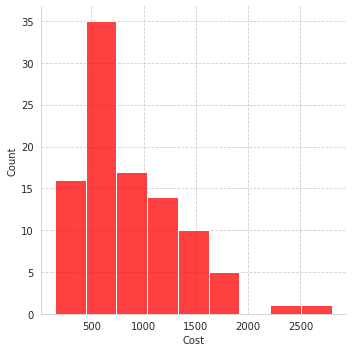

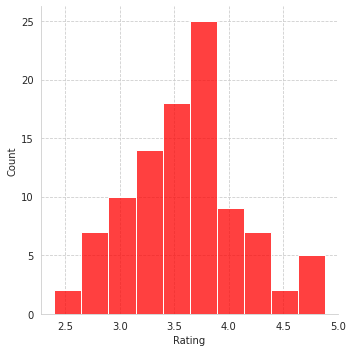

In [163]:
for col in ['Cost','Rating']:
  sns.displot(df_cluster[col],color='red')

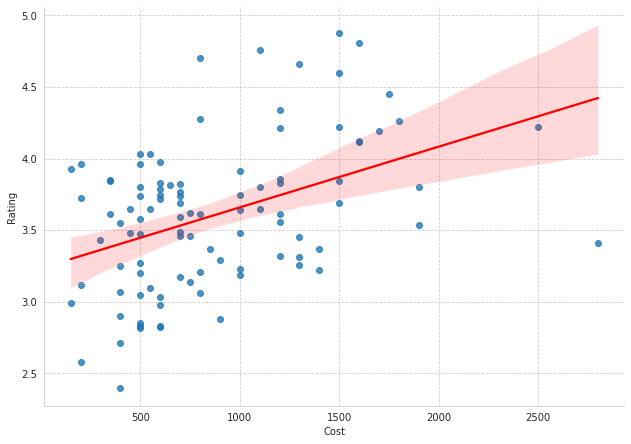

In [164]:
#Correlation check
sns.lmplot(y='Rating',x='Cost',data=df_cluster,line_kws={'color' :'red'},height=6.27, aspect=11.7/8.27)

###We can find a positive correlation between Rating and Cost feature

In [165]:
#Creating a copy of df_cluster in new dataframe
df_final_cluster = df_cluster.copy()

In [166]:
#dropping name column from the dataset
df_final_cluster.drop('Name',inplace=True,axis=1)
df_final_cluster.head()

,Cost,cuisine_Fast Food,cuisine_Starter Food,cuisine_Continental food,cuisine_Indian Food,cuisine_Beverges n Desserts,cuisine_South-East Asian Food,Rating
0,1900.0,0,0,1,1,0,1,3.80
1,450.0,0,0,0,1,0,0,3.48
2,1100.0,0,0,2,1,0,0,4.76
3,1500.0,0,0,2,1,0,0,4.88
4,750.0,0,0,2,0,0,1,3.62


## **Feature Scaling before clustering**

In [167]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [168]:
#fitting numerical columns
numerical_cols = ['Cost','Rating']
scaler = MinMaxScaler()
scaler.fit(df_final_cluster[numerical_cols])
df_final_cluster_scaled = df_final_cluster.copy()
df_final_cluster_scaled[numerical_cols] = scaler.transform(df_final_cluster[numerical_cols])

##**K-Means Clustering on COST and RATING column**

In [169]:
# importing few k-means libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing



###**Elbow Method** (to determine optimal cluster value)

In [170]:
#Within Cluster Sum of Squared Errors for different values of k
#let's first take two variables only 
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df_final_cluster_scaled[['Cost','Rating']])
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

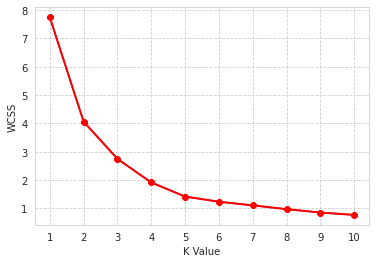

In [171]:
#The elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

The optimal number of clusters here would be 5. It can be clearly observed that after 5 there is minimal drop in WCSS. Let's go ahead and model for 5 clusters.

###**Silhouette Method**  (to determine optimal cluster value)

In [172]:
#finding best cluster by silhouette score
from sklearn import metrics

k_range = range(2, 8)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=10)
    km.fit(df_final_cluster_scaled)
    scores.append(metrics.silhouette_score(df_final_cluster_scaled, km.labels_))

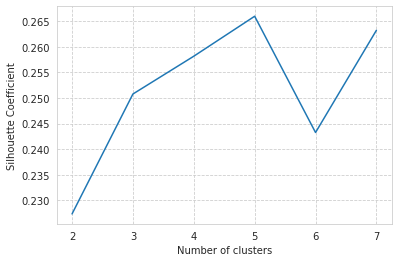

In [173]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [174]:
X = df_final_cluster_scaled

For n_clusters = 2 The average silhouette_score is : 0.22734131886307685
For n_clusters = 3 The average silhouette_score is : 0.2507756191269146
For n_clusters = 4 The average silhouette_score is : 0.25816395495816186
For n_clusters = 5 The average silhouette_score is : 0.26597595229548815
For n_clusters = 6 The average silhouette_score is : 0.24325391588940995
For n_clusters = 7 The average silhouette_score is : 0.26322953859136283
For n_clusters = 8 The average silhouette_score is : 0.23701401899839666


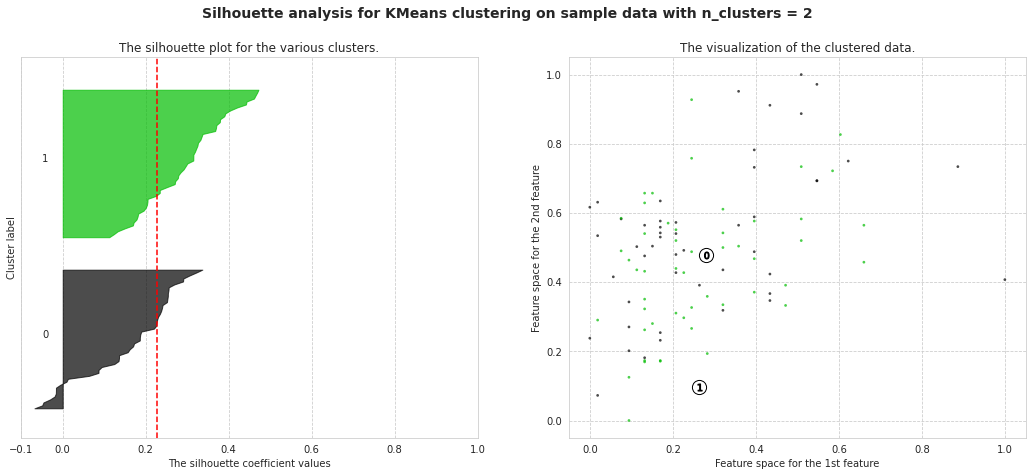

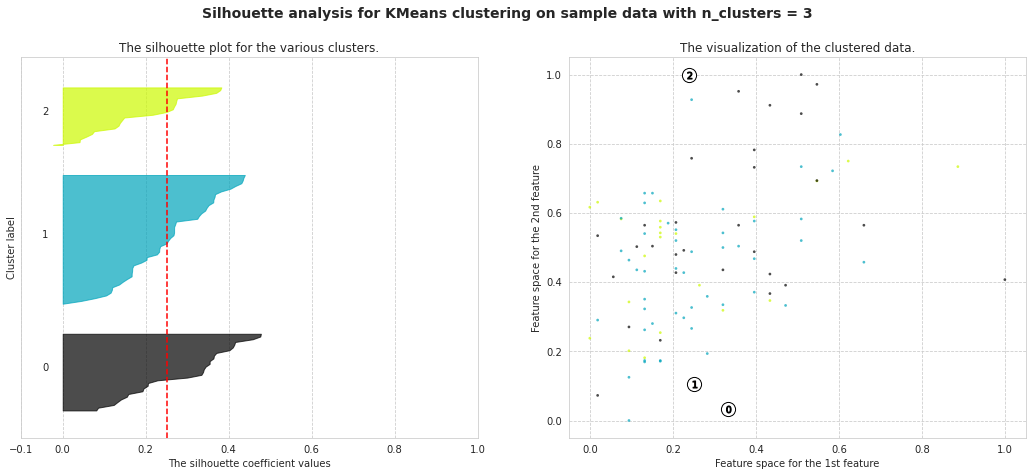

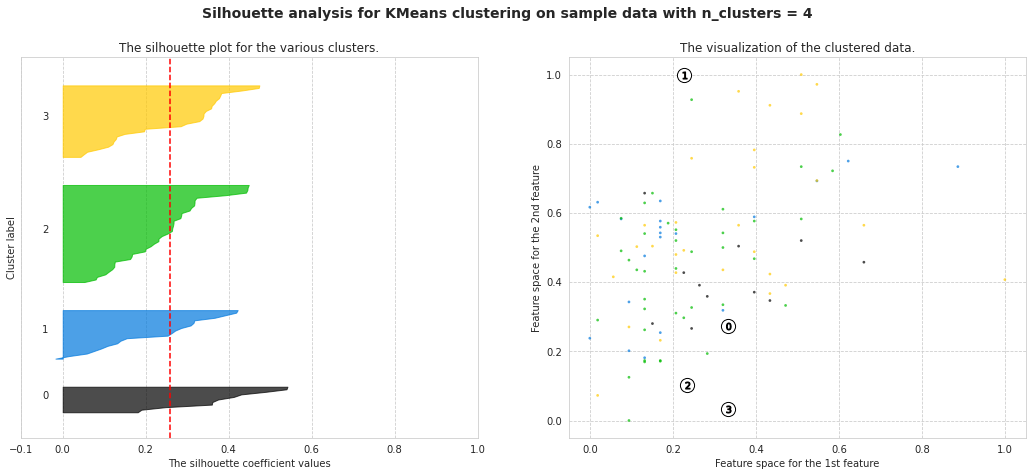

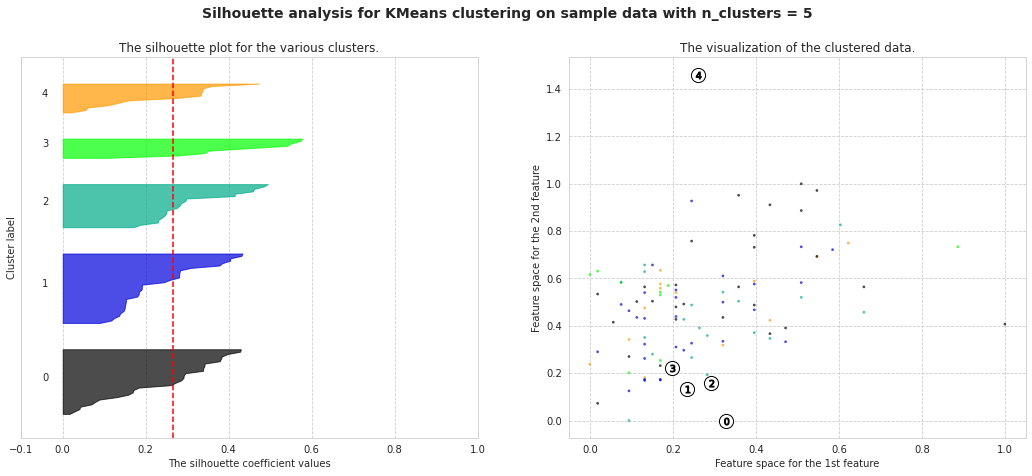

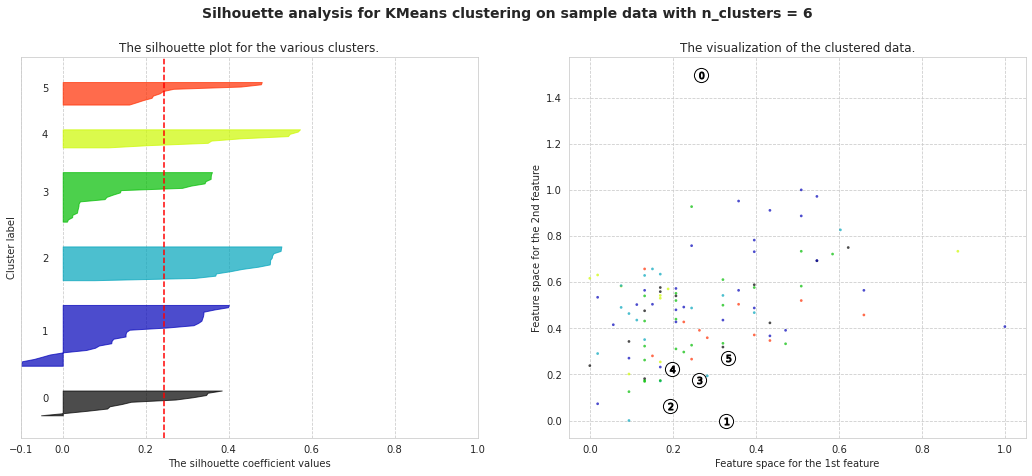

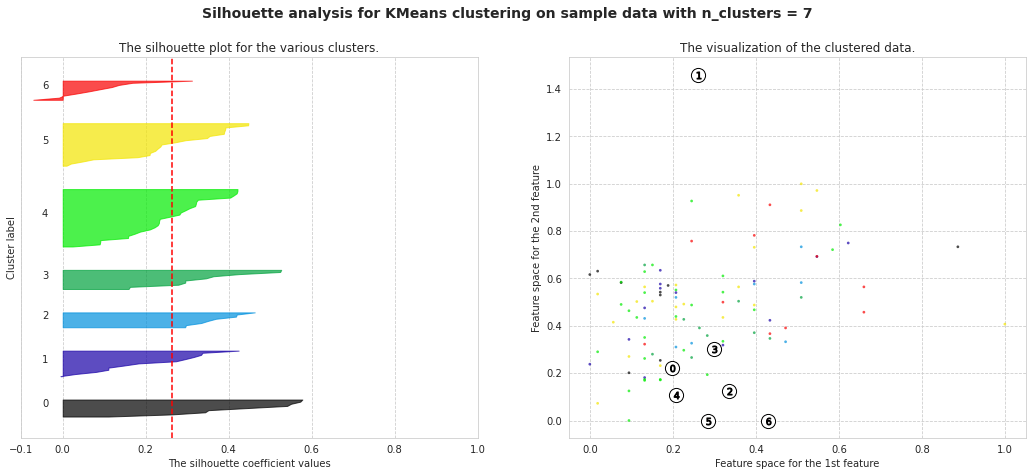

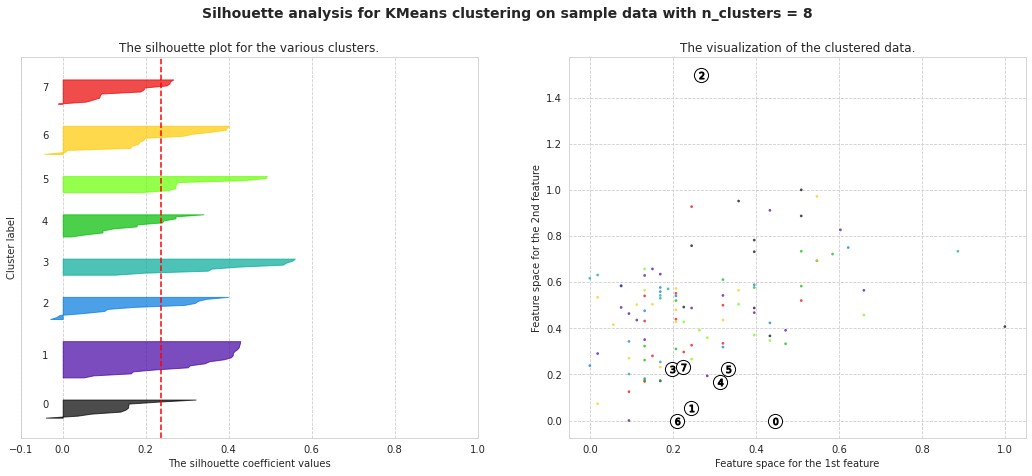

In [175]:
#Visualising the silhouette plot for the various clusters
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 7], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

According to the silhouette score we are getting optimal cluster value as 5.

In [176]:
#create a copy
kmeans_df = df_final_cluster_scaled.copy()

In [177]:
#fit predict kmeans on 5 clusters
kmean_model = KMeans(n_clusters=5,random_state= 42)
kmean_pred = kmean_model.fit_predict(kmeans_df[['Cost', 'Rating']])
kmeans_df["label"] = kmean_pred

Text(0.5, 1.0, 'Cost vs Average Rating')

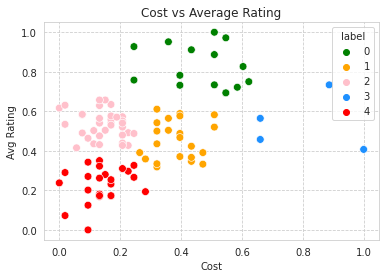

In [178]:
#Scatterplot of the clusters
sns.scatterplot(x = 'Cost',y = 'Rating',hue="label",  
                 palette=['green','orange','pink','dodgerblue','red'], legend='full',data = kmeans_df  ,s = 60 )
plt.xlabel('Cost')
plt.ylabel('Avg Rating') 
plt.title('Cost vs Average Rating')

The clusters are pretty distinguishable from each other.
Since the input variables were just two, it is easier to distinguish and interpret them.
* Label 0(Red) are those restaurants that  weren't reviewed. 
* Label 1(Pink) are the restaurants that have good ratings with low pricing.
* Label 2(Orange) are fine dining restaurants with good ratings and average pricing.
* Label 3(Green) restaurants are small food joints with low pricing but had average ratings.
* Label 4(Blue) are expensive restaurants that also had above-average ratings.

##**Principle Component Analysis (PCA)**

In [179]:
#principal component analysis
from sklearn.decomposition import PCA
#choosing 3 components
pca = PCA(n_components=3)
#fitting pca
pca_result = pca.fit_transform(df_final_cluster_scaled)
#variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.34379537 0.21169382 0.18900519]
Cumulative variance explained by 3 principal components: 74.45%


In [180]:
print(pca.components_)

[[ 0.02209482 -0.15495107  0.04398156 -0.25286565  0.83268203 -0.31552006
   0.34083549 -0.02335539]
 [ 0.08590383 -0.31117941  0.0647255   0.828898   -0.0315635  -0.42047127
   0.15163164  0.06117297]
 [ 0.00272031 -0.01813482  0.03671656 -0.22411444 -0.45557053 -0.08190558
   0.85642995 -0.01905368]]


In [181]:
ratios = pca.explained_variance_ratio_
ratios

array([0.34379537, 0.21169382, 0.18900519])

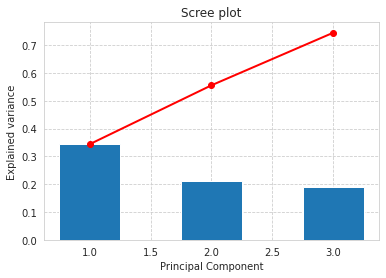

In [182]:
plt.bar(range(1,len(ratios)+1),ratios,width=0.5)
plt.plot(range(1,len(ratios)+1),np.cumsum(ratios),'o-', linewidth=2, color='red')
plt.xlabel("Principal Component")
plt.ylabel("Explained variance")
plt.title("Scree plot");

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

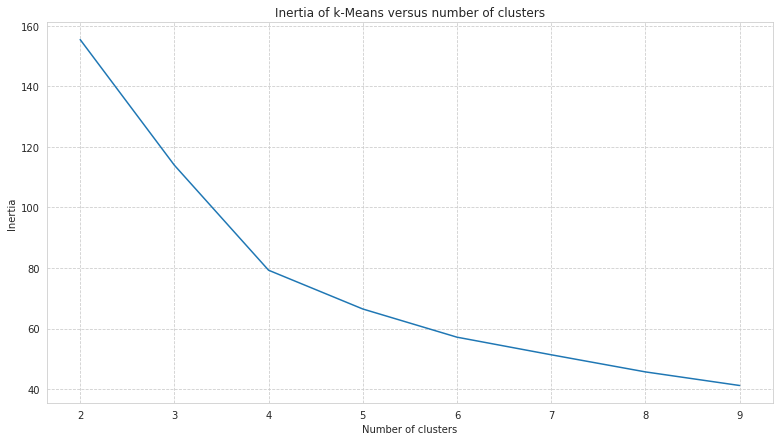

In [183]:
scores = [KMeans(n_clusters=i+2, random_state=11).fit(pca_result).inertia_ 
          for i in range(8)]
plt.figure(figsize=(13,7))
sns.lineplot(np.arange(2, 10), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Parameter: {'n_clusters': 2} Score 0.2997951415660126
Parameter: {'n_clusters': 3} Score 0.3380779519988871
Parameter: {'n_clusters': 4} Score 0.3650580517654092
Parameter: {'n_clusters': 5} Score 0.3466774110951679
Parameter: {'n_clusters': 6} Score 0.3604063459503715
Parameter: {'n_clusters': 7} Score 0.35618443735139765
Parameter: {'n_clusters': 8} Score 0.3649019696274992


Text(0.5, 0, 'Number of Clusters')

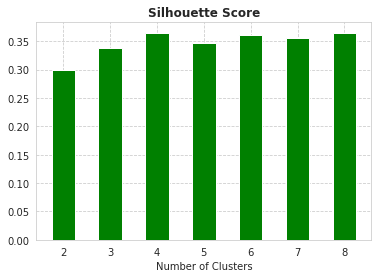

In [184]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,9))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans(random_state = 11)     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(pca_result)          # fit model 
    score = silhouette_score(pca_result, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [score]       # store all the scores
    print('Parameter:', p, 'Score', score)
    # check p which has the best score
    if score > best_score:
        best_score = score
        best_grid = p

# plotting 
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='green', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')

In [185]:
# fitting KMeans    
kmeans_pca = KMeans(n_clusters=4,random_state=11)
kmeans_pca.fit(pca_result)

KMeans(n_clusters=4, random_state=11)

In [186]:
#fit predict kmeans 
kmeans_pca_df = pd.DataFrame(pca_result,columns=['PC1','PC2','PC3'],index=df_final_cluster_scaled.index)
pred_pca = kmeans_pca.fit_predict(pca_result)
kmeans_pca_df["label"] = pred_pca

Text(0.5, 0, 'PC3')

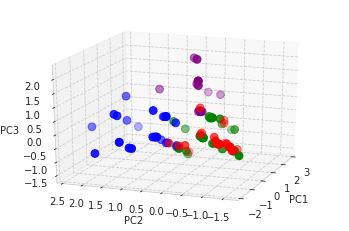

In [187]:
#plotting 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 0], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 0], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 0], c='purple', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 1], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 1], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 1], c='red', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 2], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 2], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 2], c='blue', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 3], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 3], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 3], c='green', s=60)

ax.view_init(20, 200)
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.set_zlabel('PC3')

##**Hierarchical clustering on COST and RATING column**

###**Dendogram to find the optimal number of clusters**





In [188]:
X_ = df_final_cluster_scaled.loc[:,['Cost','Rating']]

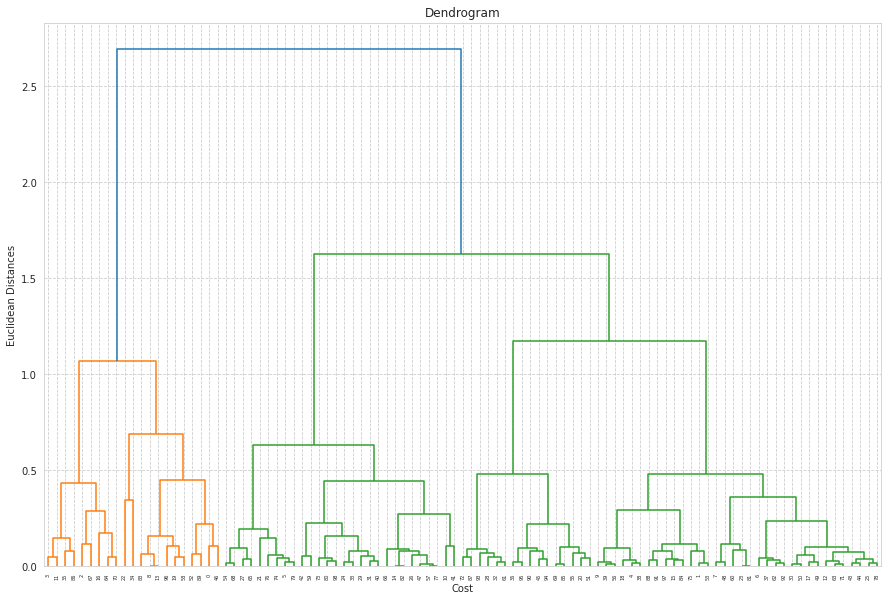

In [189]:
#The dendogram plot 
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X_, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Cost')
plt.ylabel('Euclidean Distances')

plt.show() # find largest vertical distance we can make without crossing any other horizontal line

### <b> How should we Choose the Number of Clusters in Hierarchical Clustering? </b>

### A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters. 

### We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). 

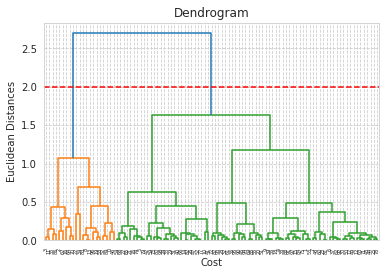

In [190]:
dendrogram = sch.dendrogram(sch.linkage(X_, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Cost')
plt.ylabel('Euclidean Distances')
plt.axhline(y=2.0, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

###**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.**
**No. of Cluster = 2**



In [191]:
#Checking the Silhouette score for 11 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(X_)
    score = silhouette_score(X_, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4935953988876826
For n_clusters = 3, silhouette score is 0.3899543651505021
For n_clusters = 4, silhouette score is 0.40514571457441045
For n_clusters = 5, silhouette score is 0.4275811059555179
For n_clusters = 6, silhouette score is 0.4335438050854936
For n_clusters = 7, silhouette score is 0.3905022848326957
For n_clusters = 8, silhouette score is 0.32684509654489624
For n_clusters = 9, silhouette score is 0.35310735860931813
For n_clusters = 10, silhouette score is 0.3571773481658455
For n_clusters = 11, silhouette score is 0.3617873340769371


In [192]:
# Fitting hierarchical clustering to the  dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_)

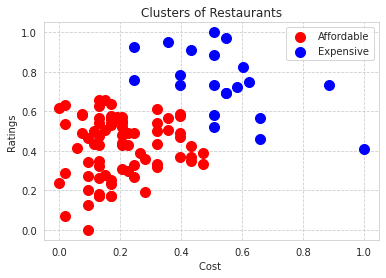

In [193]:
# Visualizing the clusters (two dimensions only)
plt.scatter(X_.iloc[y_hc == 0, 0], X_.iloc[y_hc == 0, 1], s = 100, c = 'red', label = 'Affordable')
plt.scatter(X_.iloc[y_hc == 1, 0], X_.iloc[y_hc == 1, 1], s = 100, c = 'blue', label = 'Expensive')

plt.title('Clusters of Restaurants')
plt.xlabel('Cost ')
plt.ylabel('Ratings')
plt.legend()
plt.show()

##**DBSCAN on COST and Rating Column**

In [194]:
from numpy import math,unique

In [195]:
dbscan_df=df_final_cluster_scaled.copy()

In [196]:
# dbscan clustering

from sklearn.cluster import DBSCAN

# define the model
model = DBSCAN(eps=0.15, min_samples=5)
# fit model and predict clusters
yhat = model.fit_predict(X_)
# retrieve unique clusters
clusters = unique(yhat)
dbscan_df["Label_DBscan"] = yhat
score = silhouette_score(X_, yhat)
print(score)


0.40874230314049886


Text(0.5, 1.0, 'Ratings vs Cost')

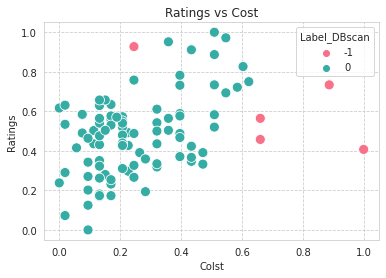

In [197]:
#Scatterplot of the clusters
#plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Cost',y = 'Rating',palette = sns.color_palette("husl",len(clusters)),hue="Label_DBscan", legend='full',data = dbscan_df ,s = 100 )
plt.xlabel('Colst')
plt.ylabel('Ratings') 
plt.title('Ratings vs Cost')

##**Clustering Summary Table**

In [198]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with elbow method  ", "RC", "range between 2 - 7"])
myTable.add_row(['2',"K-Means with silhouette_score ", "RC", "5"]) 
myTable.add_row(['3',"PCA (3 components) with elbow method ", "RC", "range between 3 - 7"])
myTable.add_row(['4',"PCA (3 components) with silhouette_score ", "RC", "4"])  
myTable.add_row(['5',"Hierarchical clustering with dendogram", "RC", "2"]) 
myTable.add_row(['6',"Hierarchical clustering with silhouette_score  ", "RC", "2"])
myTable.add_row(['7',"DBSCAN ", "RC", "2"])



print(myTable)

+--------+-------------------------------------------------+------+---------------------------+
| SL No. |                    Model_Name                   | Data | Optimal_Number_of_cluster |
+--------+-------------------------------------------------+------+---------------------------+
|   1    |           K-Means with elbow method             |  RC  |    range between 2 - 7    |
|   2    |          K-Means with silhouette_score          |  RC  |             5             |
|   3    |      PCA (3 components) with elbow method       |  RC  |    range between 3 - 7    |
|   4    |    PCA (3 components) with silhouette_score     |  RC  |             4             |
|   5    |      Hierarchical clustering with dendogram     |  RC  |             2             |
|   6    | Hierarchical clustering with silhouette_score   |  RC  |             2             |
|   7    |                     DBSCAN                      |  RC  |             2             |
+--------+------------------------------

##**3D visualization of Cost,Rating,Cuisine count**

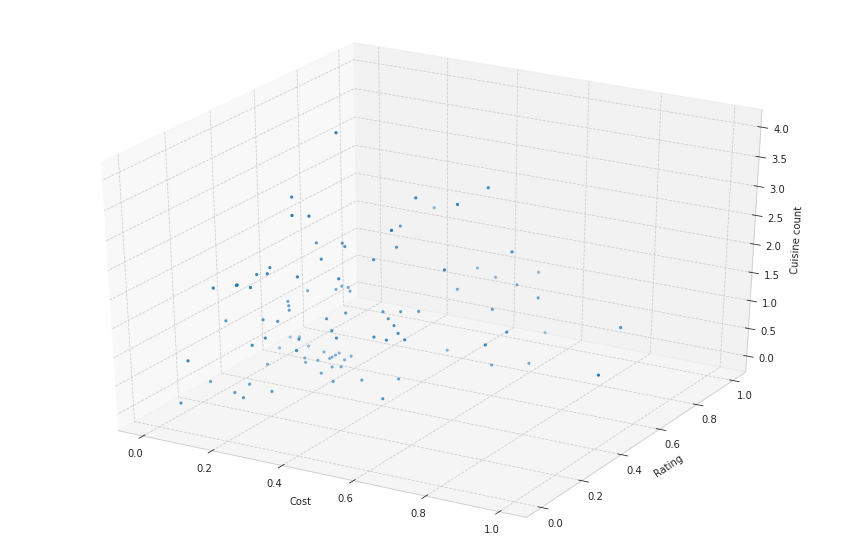

In [199]:
# 3-d visualization of data points
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15,10))
plt.title('3d visualization ')
ax=fig.add_subplot(111,projection='3d')
xs=df_final_cluster_scaled['Cost']
ys=df_final_cluster_scaled['Rating']
zs=df_final_cluster_scaled['cuisine_Indian Food']
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Cost')
ax.set_ylabel('Rating')
ax.set_zlabel('Cuisine count')
plt.show()

##**Cluster Analysis and Exploration**

In [200]:
# storing the kmeans ,pca and heirachical clustering values into new features in the df_cluster dataset
df_cluster['cluster_kmean']=kmean_pred
df_cluster['cluster_hier']=y_hc
df_cluster['cluster_pca']=pred_pca

df_cluster.head()

,Name,Cost,cuisine_Fast Food,cuisine_Starter Food,cuisine_Continental food,cuisine_Indian Food,cuisine_Beverges n Desserts,cuisine_South-East Asian Food,Rating,cluster_kmean,cluster_hier,cluster_pca
0,10 Downing Street,1900.0,0,0,1,1,0,1,3.80,3,1,2
1,13 Dhaba,450.0,0,0,0,1,0,0,3.48,2,0,3
2,"3B's - Buddies, Bar & Barbecue",1100.0,0,0,2,1,0,0,4.76,0,1,2
3,AB's - Absolute Barbecues,1500.0,0,0,2,1,0,0,4.88,0,1,2
4,Absolute Sizzlers,750.0,0,0,2,0,0,1,3.62,2,0,2


###For  Cluster Analysis we are considering optimal number of clusters as 4 which we have obatained from our Principal Component Analysis thereby will be doing analysis and exploration of each clusters one by one

**Cluster 0**

In [201]:
#exploring cluster 0 
df_cluster[df_cluster['cluster_pca']==0].head(3)


,Name,Cost,cuisine_Fast Food,cuisine_Starter Food,cuisine_Continental food,cuisine_Indian Food,cuisine_Beverges n Desserts,cuisine_South-East Asian Food,Rating,cluster_kmean,cluster_hier,cluster_pca
9,Aromas@11SIX,750.0,0,0,0,1,0,3,3.460,2,0,0
20,Chinese Pavilion,1000.0,0,0,0,1,0,1,3.745,1,0,0
21,Club Rogue,900.0,0,0,0,1,0,1,2.880,4,0,0


In [202]:
#using a function to find cuisines  category highly on demand in cluster 0
def cuisines_categ(df,cluster):
  cuisines_cat_df = pd.DataFrame()
  cuisines_cat_df['Cuisines'] = cuisines_list
  cuisines_cat_df['Total Number of Restaurants'] = [df[i].sum() for i in cuisines_list]
  #visualizing cuisines category
  sns.barplot(x='Total Number of Restaurants', y='Cuisines',data=cuisines_cat_df)
  plt.title(f'The Most Popular Cuisines Category in {cluster}',size=10)

In [203]:
#List of restaurants in Cluster 0(at max 10 displayed)
df_cluster[df_cluster['cluster_pca']==0]['Name'][:10]

9          Aromas@11SIX
20     Chinese Pavilion
21           Club Rogue
27         Dine O China
28      Diners Pavilion
31       Dunkin' Donuts
32    Eat India Company
37                 GD's
38        Gal Punjab Di
41     Hotel Zara Hi-Fi
Name: Name, dtype: object

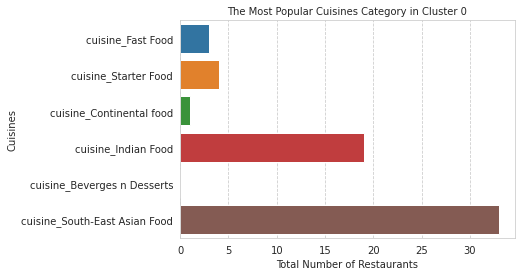

In [204]:
#visualizing cuisines in cluster 0
cuisines_categ(df_cluster[df_cluster['cluster_pca']==0],'Cluster 0')

In [205]:
#describe
df_cluster[df_cluster['cluster_pca']==0].describe()

,Cost,cuisine_Fast Food,cuisine_Starter Food,cuisine_Continental food,cuisine_Indian Food,cuisine_Beverges n Desserts,cuisine_South-East Asian Food,Rating,cluster_kmean,cluster_hier,cluster_pca
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.000000,19.000000,19.000000,19.000000,19.0
mean,923.684211,0.157895,0.210526,0.052632,1.000000,0.0,1.736842,3.469737,2.105263,0.157895,0.0
std,445.461191,0.374634,0.418854,0.229416,0.471405,0.0,0.733493,0.458838,1.328940,0.374634,0.0
min,350.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.400000,0.000000,0.000000,0.0
25%,525.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,3.265000,1.000000,0.000000,0.0
50%,850.000000,0.000000,0.000000,0.000000,1.000000,0.0,2.000000,3.460000,2.000000,0.000000,0.0
75%,1150.000000,0.000000,0.000000,0.000000,1.000000,0.0,2.000000,3.717500,3.500000,0.000000,0.0
max,1900.000000,1.000000,1.000000,1.000000,2.000000,0.0,3.000000,4.450000,4.000000,1.000000,0.0


**Cluster 0 Observation:**

*  The mostly available cuisine in the restaurants in cluster 0 is the  South east asian cuisines followed by Indian cuisine.



*   The restaurants in cluster 0 does not having Beverges and Deserts available. 



* The average rating is 3.46 and the average cost is 923 INR which includes an outlier of cost 1150 INR and median cost of 525 INR. This means the restaurants are basically in general cheap in nature in this cluster .

**Cluster 1**

In [206]:
#exploring cluster  
df_cluster[df_cluster['cluster_pca']==1].head(3)

,Name,Cost,cuisine_Fast Food,cuisine_Starter Food,cuisine_Continental food,cuisine_Indian Food,cuisine_Beverges n Desserts,cuisine_South-East Asian Food,Rating,cluster_kmean,cluster_hier,cluster_pca
6,American Wild Wings,600.0,1,0,0,1,1,1,3.974026,2,0,1
7,Amul,150.0,0,0,0,0,2,0,3.929293,2,0,1
8,Arena Eleven,1600.0,1,0,0,0,0,0,4.117647,0,1,1


In [207]:
#List of restaurants in Cluster 1(at max 10 displayed)
df_cluster[df_cluster['cluster_pca']==1]['Name'][:10]

6                         American Wild Wings
7                                        Amul
8                                Arena Eleven
19    Cascade - Radisson Hyderabad Hitec City
23                                Cream Stone
26                                 Desi Bytes
29                             Domino's Pizza
30                                Driven Cafe
33                                     Faasos
34           Feast - Sheraton Hyderabad Hotel
Name: Name, dtype: object

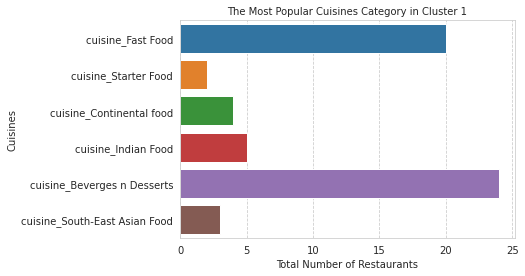

In [208]:
#visualizing cuisines in cluster 1
cuisines_categ(df_cluster[df_cluster['cluster_pca']==1],'Cluster 1')

In [209]:
#describe
df_cluster[df_cluster['cluster_pca']==1].describe()

,Cost,cuisine_Fast Food,cuisine_Starter Food,cuisine_Continental food,cuisine_Indian Food,cuisine_Beverges n Desserts,cuisine_South-East Asian Food,Rating,cluster_kmean,cluster_hier,cluster_pca
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,735.714286,0.952381,0.095238,0.190476,0.238095,1.142857,0.142857,3.611780,2.333333,0.142857,1.0
std,589.945518,0.864650,0.300793,0.402374,0.436436,0.910259,0.358569,0.450340,1.278019,0.358569,0.0
min,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.850000,0.000000,0.000000,1.0
25%,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.190000,2.000000,0.000000,1.0
50%,600.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.745000,2.000000,0.000000,1.0
75%,700.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.929293,4.000000,0.000000,1.0
max,2500.000000,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000,4.260000,4.000000,1.000000,1.0


**Cluster 1 Observation:**

*  The mostly available cuisine in the restaurants of cluster 1 is the  Beverges and Desserts cuisines followed by Fast Food cuisine.


*   The restaurants in cluster 1  have a few  starter cuisines available



* The average rating is 3.61 and the average cost is 736 INR which includes an outlier of cost 2500 INR and median cost of 600 INR.. These restaurants are slightly higher in prices than cluster 0.

**Cluster 2**

In [210]:
#exploring cluster 2 
df_cluster[df_cluster['cluster_pca']==2].head(3)

,Name,Cost,cuisine_Fast Food,cuisine_Starter Food,cuisine_Continental food,cuisine_Indian Food,cuisine_Beverges n Desserts,cuisine_South-East Asian Food,Rating,cluster_kmean,cluster_hier,cluster_pca
0,10 Downing Street,1900.0,0,0,1,1,0,1,3.80,3,1,2
2,"3B's - Buddies, Bar & Barbecue",1100.0,0,0,2,1,0,0,4.76,0,1,2
3,AB's - Absolute Barbecues,1500.0,0,0,2,1,0,0,4.88,0,1,2


In [211]:
#List of restaurants in Cluster 2(at max 10 displayed)
df_cluster[df_cluster['cluster_pca']==2]['Name'][:10]

0                  10 Downing Street
2     3B's - Buddies, Bar & Barbecue
3          AB's - Absolute Barbecues
4                  Absolute Sizzlers
10                    Asian Meal Box
11                            B-Dubs
13                   Barbeque Nation
15                      Being Hungry
16                   Beyond Flavours
18                        Cafe Eclat
Name: Name, dtype: object

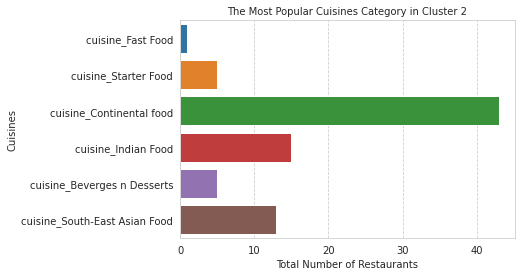

In [212]:
#visualizing cuisines in cluster 2
cuisines_categ(df_cluster[df_cluster['cluster_pca']==2],'Cluster 2')

In [213]:
#describe
df_cluster[df_cluster['cluster_pca']==2].describe()

,Cost,cuisine_Fast Food,cuisine_Starter Food,cuisine_Continental food,cuisine_Indian Food,cuisine_Beverges n Desserts,cuisine_South-East Asian Food,Rating,cluster_kmean,cluster_hier,cluster_pca
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0
mean,1051.785714,0.035714,0.178571,1.535714,0.535714,0.178571,0.464286,3.828267,1.357143,0.392857,2.0
std,571.625710,0.188982,0.475595,0.637248,0.576204,0.390021,0.576204,0.566018,1.223664,0.497347,0.0
min,200.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.580000,0.000000,0.000000,2.0
25%,675.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.457500,0.000000,0.000000,2.0
50%,1100.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,3.687500,1.000000,0.000000,2.0
75%,1325.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,4.231250,2.000000,1.000000,2.0
max,2800.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,4.880000,4.000000,1.000000,2.0


**Cluster 2 Observation:**

*   The mostly in demand and available cuisine in the restaurants of cluster 2 is the Continental  cuisines followed by Indian  cuisine.


*   The restaurants in cluster 2 have a few fast food cuisines available.

*   The average rating is 3.82 and the average cost is 1052 INR which includes an outlier of cost 2800 INR and median cost of 1100 INR.. These restaurants are fine dining restaurants and expensive as well compared to other clusters like 0 and 1.



**Cluster 3**

In [214]:
#exploring cluster 3
df_cluster[df_cluster['cluster_pca']==3].head(3)

,Name,Cost,cuisine_Fast Food,cuisine_Starter Food,cuisine_Continental food,cuisine_Indian Food,cuisine_Beverges n Desserts,cuisine_South-East Asian Food,Rating,cluster_kmean,cluster_hier,cluster_pca
1,13 Dhaba,450.0,0,0,0,1,0,0,3.480000,2,0,3
5,Al Saba Restaurant,750.0,1,1,0,2,0,1,3.136364,4,0,3
12,Banana Leaf Multicuisine Restaurant,700.0,0,0,0,4,0,1,3.690000,2,0,3


In [215]:
#List of restaurants in Cluster 3(at max 10 displayed)
df_cluster[df_cluster['cluster_pca']==3]['Name'][:10]

1                                13 Dhaba
5                      Al Saba Restaurant
12    Banana Leaf Multicuisine Restaurant
14                        Behrouz Biryani
17                      Biryanis And More
39              Green Bawarchi Restaurant
40              Hitech Bawarchi Food Zone
42                     Hunger Maggi Point
45                            Hyper Local
53                    Kritunga Restaurant
Name: Name, dtype: object

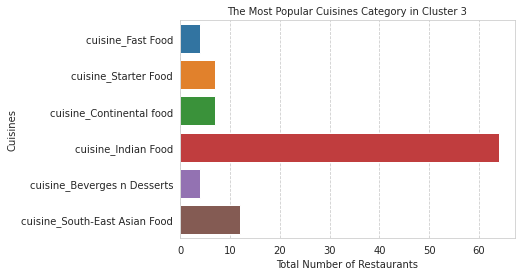

In [216]:
#visualizing cuisines in cluster 3
cuisines_categ(df_cluster[df_cluster['cluster_pca']==3],'Cluster 3')

In [217]:
#describe
df_cluster[df_cluster['cluster_pca']==3].describe()

,Cost,cuisine_Fast Food,cuisine_Starter Food,cuisine_Continental food,cuisine_Indian Food,cuisine_Beverges n Desserts,cuisine_South-East Asian Food,Rating,cluster_kmean,cluster_hier,cluster_pca
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,769.354839,0.129032,0.225806,0.225806,2.064516,0.129032,0.387097,3.480813,2.290323,0.129032,3.0
std,379.182766,0.340777,0.425024,0.425024,0.771815,0.427546,0.495138,0.474689,1.418768,0.340777,0.0
min,200.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.710000,0.000000,0.000000,3.0
25%,500.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,3.153182,1.000000,0.000000,3.0
50%,700.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,3.490000,2.000000,0.000000,3.0
75%,1000.000000,0.000000,0.000000,0.000000,2.500000,0.000000,1.000000,3.791338,4.000000,0.000000,3.0
max,1700.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,4.700000,4.000000,1.000000,3.0


**Cluster 3 Observation:**

*   The mostly in demand and available cuisine in the restaurants of cluster 3 is the Indian cuisines.

*   The restaurants in cluster 2 have a very few demand of fast food and beverages.



*   The average rating is 3.48 and the average cost is 769 INR which includes an outlier of cost 1700 INR and median cost of 700 INR.. These restaurants are afforadable and mostly preferred cuisine in high numbers in these restaurants.









###**The Highly Rated Clusters**

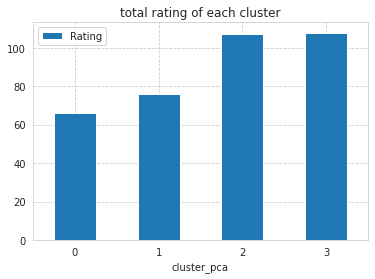

In [218]:
# ploting average cost of each PCA cluster
pd.DataFrame(df_cluster.groupby('cluster_pca')['Rating'].sum()).plot(kind="bar")
plt.xticks(rotation=0)
plt.title('total rating of each cluster')
plt.show()

From the above plot,we can say that both the clusters 2 and 3 were having good restaurants in their respective clusters  with high ratings

### **The Most Expensive and Affordable Clusters**

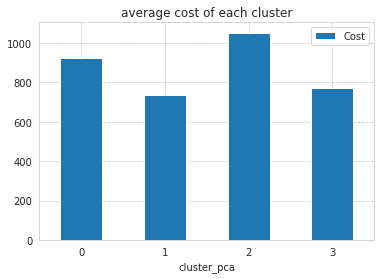

In [219]:
# ploting average cost of each cluster
pd.DataFrame(df_cluster.groupby('cluster_pca')['Cost'].mean()).plot(kind="bar")
plt.xticks(rotation=0)
plt.title('average cost of each cluster')
plt.show()

From the above plot,we can see that  the clusters 2  restaurants were the most expensive ones. On the other hand, Cluster 1 restaurants were the most affordable ones.

###**The Number of restaurants in each Clusters**

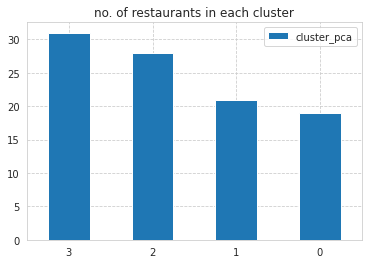

In [220]:
#Plotting number of restaurants in each PCA clusters
pd.DataFrame(df_cluster['cluster_pca'].value_counts()).plot(kind="bar")
plt.xticks(rotation=0)
plt.title('no. of restaurants in each cluster')
plt.show()

From the above plot,we can say that the clusters 3 were having pretty high numbers of restaurants in its cluster comparatively.

###**Findings**


*   The Cluster 2 is the most expensive and highly rated cluster.The cuisines which are highly on demand in these restaurants are Continenatel Food and the least in demand cuisine is the Fast Food in this cluster.

*   The Cluster 0 is the least rated cluster.The cuisines which are highly on demand in these restaurants are South East Asian Cuisines.
 
*   The Cluster 1 is the most affordable and moderately rated cluster with Beverages and desert cuisine are highly in demand followed by fast food.

*   The Cluster 3 is the most popular cluster for the Indian Cuisines and restaurants in these cluster is compartively higher than other cluster.Hence the restaurants in cluster 3 is the busiest and the highly on demand cuisine.
The Rating and Costing in this cluster is compartively in a balanced and moderate range,hence based on rating and costing parameter we can say that cluster 3 is one of the best choice of any average income individual. 







#**Cost-Benefit Analysis**

 A Cost-Benefit Analysis is a process of analyzing the worth of a decision by estimating the costs incurred in implementing that decision and comparing them with the benefits of that decision. 
If the projected benefits outweigh the costs, you'll be making money out of that decision and if not, it's important to strategize a better plan.

Zomato is an Indian restaurant search and an online food delivery service. Zomato focuses on online food ordering, restaurant reservations, and loyalty programs. The target customers for the company are restaurant chains that want to reach a larger audience and application users who just want to try out local restaurants and various cuisines.
Here is a simple cost-benefit analysis that can be carried out on the basis of the little information we can assume.

**Costs**

When tallying costs, beginning with direct costs, which include expenses directly related to the production or development of a product or service (or the implementation of a project or business decision) which is in the case of Zomato is primarily the mobile application. Maintaining the application, strategizing plans, including the restaurants, marketing, food delivering partners and customer support needs a huge team to work on. The salaries of the employees would be a direct cost.

Other indirect costs include utilities, rent, partners, advertisers, etc.

There are some other costs that are difficult to measure such as negative reviews on the platform which leads to people avoiding the application altogether, bad presence on social media, etc. 

**Benefits**

The major source of Revenue is Advertising. More and more restaurants want to promote themselves on the Zomato feed in order to gain attention and visibility from a large section of Zomato subscribers and customer base.

Through the food delivery service, Zomato charges a commission to the restaurants on the basis of orders. The company earns through restaurants that pay a commission for each delivery, which is then split among the delivery partners and the company. However, online food delivery only contributes a low percentage of income compared to other revenue streams because of the huge competition and the need to provide deep discounts, etc.


**Comparison**

The data that we have consists of per-person cost, cuisines available at the restaurant, and an average rating of the restaurant. If a restaurant isn't performing well in terms of rating and has a high per-person cost and a low number of popular cuisines, this is going to be a problem for Zomato.
Since negative reviews would be an intangible cost to the company and with that the company will start to lose daily application users. 
The application users are an asset to the company, Zomato gets advertising by different restaurants because of the large audience they have.

All in all, it is important to separate out the restaurants that Zomato needs to work on in order to improve its overall customer experience and if improvement strategies don't work out, they need to delist those restaurants themselves.

In [221]:
# filtering out the restaurants with avg rating less than 3 and sorting them out acc to high cost
low_rating_rest = df_cluster[df_cluster['Rating'] < 3].sort_values(['Rating', 'Cost'],ascending=[True,True],ignore_index=True)
low_rating_rest.head(12)

,Name,Cost,cuisine_Fast Food,cuisine_Starter Food,cuisine_Continental food,cuisine_Indian Food,cuisine_Beverges n Desserts,cuisine_South-East Asian Food,Rating,cluster_kmean,cluster_hier,cluster_pca
0,Hotel Zara Hi-Fi,400.0,0,0,0,1,0,1,2.400,4,0,0
1,Asian Meal Box,200.0,0,0,1,0,0,0,2.580,4,0,2
2,Pakwaan Grand,400.0,0,0,0,2,0,1,2.710,4,0,3
3,Mathura Vilas,500.0,0,0,0,2,0,1,2.820,4,0,3
4,Behrouz Biryani,600.0,0,1,0,1,0,0,2.825,4,0,3
5,Shree Santosh Dhaba Family Restaurant,500.0,0,0,1,2,0,0,2.830,4,0,3
6,The Chocolate Room,600.0,0,0,0,2,0,0,2.830,4,0,3
7,KFC,500.0,2,0,0,0,0,0,2.850,4,0,1
8,Club Rogue,900.0,0,0,0,1,0,1,2.880,4,0,0
9,Desi Bytes,400.0,0,0,0,0,2,0,2.900,4,0,1


Text(0.5, 1.0, 'The Cuisines in Restaurants with Low Ratings')

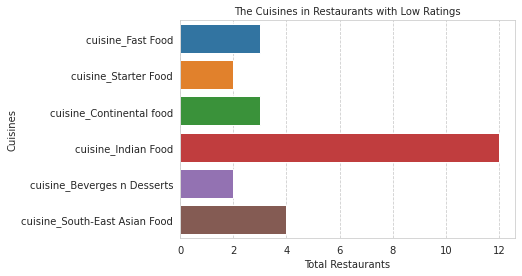

In [222]:
#cuisines involved in the low ratings dataframe
df_lr = pd.DataFrame()
df_lr['Cuisines'] = cuisines_list
df_lr['Total Restaurants'] = [low_rating_rest[i].sum() for i in cuisines_list]
#visualizing cuisines
sns.barplot(x='Total Restaurants', y='Cuisines',data=df_lr)
plt.title(f'The Cuisines in Restaurants with Low Ratings',size=10)

Text(0.5, 1.0, 'Restaurants with Low Ratings')

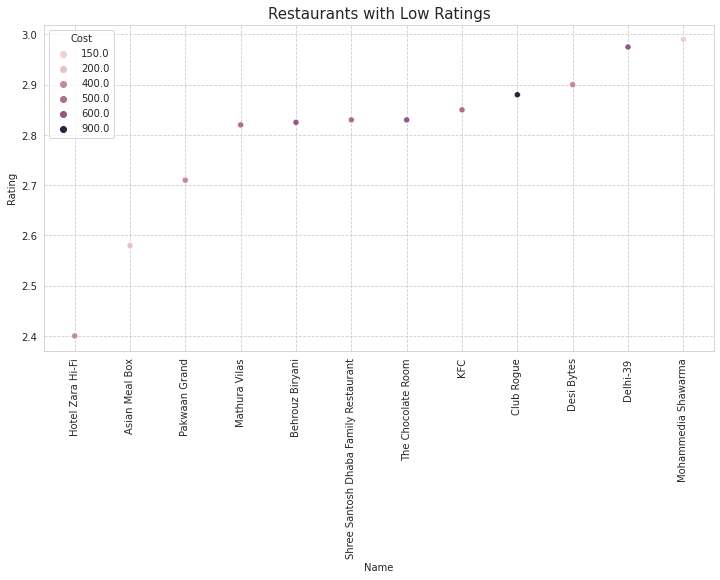

In [223]:
#visualizing the restaurants
plt.figure(figsize=(12,6))
sns.scatterplot(data=low_rating_rest, x="Name", y="Rating", hue="Cost",alpha=1, legend=True, sizes=(20, 2000))
plt.xticks(rotation=90)
plt.title('Restaurants with Low Ratings',size=15)


*   The most of the restaurants with lower ratings are providing with Indian Cuisines and adding different variety of cuisines in these restaurants may help in improving the ratings


*   Mohammedia Shawarma has the highest rating with the lowest cost. It seems it is doing well in its capacity.On the contrary , Hotel Zara Hi-Fi has the lowest rating with moderately high in pricing.

*   These restaurants are basically small food joints or restaurants with high prices according to the food they are serving.
Efforts should be made to advertise more and analyze the reviews, especially for these restaurants, and work on them.



#**Conclusion**

Some of the important conclusions to be drawn are:


* The most popular cuisines available in the most of the restaurant is the North Indian and Chinese. 

* The most frequent working hours of the restaurant is between 11am to 11pm.  

* The billing amount of rupees 500 is the most frequent cost paid by the customers on their order. 

* The collage-Hyatt Hyderbad Gachibowli is the most expensive restaurant available and the most affordable restaurant for the customers are the Amul and Mohammedia Shawarma.

* The most expensive Cuisine is the Modern India cuisine which cost around 2000 rupees and the least expensive item available at a cost of 200 rupees is the Mithai 

* Great Buffet is one of the most common Tags given to the zomato restaurants with nearly more than 40 restaurants.  

* Namit Aggarwal is one of the active reviewer based on number of followers and ratings provided

* The Restaurant with the highest rating of nearly 4.8 and good reviews is the AB's Absolute Barbecues. On the contrary, the restaurant with worst reviews and rating is the Hotel Zara Hifi with a rating less than 2.5.

* The Cost-benefit analysis on Zomato with a few assumptions one basis of the little business understanding that could be gathered, it can be concluded that it is important to separate out the restaurants with the lowest rating in order to improve its overall customer experience. Actions should be made to advertise more and analyze the reviews, especially for low rated restaurants, and work on them.

* Sentiment Analysis was done on the reviews and a model was trained in order to identify negative and positive sentiments. The best model for sentiment analysis we found out to be XGboost,LightGBM and Logistic Regression model.


 

* Restaurant Clustering was done in  with just two features Cost and Rating. Kmeans Clustering gave us optimal cluster value as 5 but we have done our clustering analysis based upon the principal component analysis because the similarities in the data points within the clusters were pretty great. We have got optimal clusters as 4 clusters in PCA. 

**Cluster 0** - The mostly available cuisine in the restaurants in cluster 0 is the South east asian cuisines followed by Indian cuisine and the restaurants in cluster 0 does not having Beverges and Deserts available.
The average rating is 3.46 and the average cost is 923 INR which includes an outlier of cost 1150 INR and median cost of 525 INR. This means the restaurants are basically in general cheaper in nature in this cluster.

**Cluster 1** - The mostly available cuisine in the restaurants of cluster 1 is the Beverges and Desserts cuisines followed by Fast Food cuisine.The average rating is 3.61 and the average cost is 736 INR which includes an outlier of cost 2500 INR and median cost of 600 INR.. These restaurants are slightly higher in prices than cluster 0.

**Cluster 2** - The mostly in demand and available cuisine in the restaurants of cluster 2 is the Continental cuisines followed by Indian cuisine.The average rating is 3.82 and the average cost is 1052 INR which includes an outlier of cost 2800 INR and median cost of 1100 INR.. These restaurants are fine dining restaurants and expensive as well compared to other clusters like 0 and 1.

**Cluster 3** - The mostly in demand and available cuisine in the restaurants of cluster 3 is the Indian cuisines.The restaurants in cluster 2 have a very few demand of fast food and beverages.The average rating is 3.48 and the average cost is 769 INR which includes an outlier of cost 1700 INR and median cost of 700 INR.. These restaurants are afforadable and mostly preferred cuisine in high numbers in these restaurants.





 **Recommendations**

- Ratings should be collected on a category basis such as rating for packaging, delivery, taste, quality, quantity, service, etc. This would help in targetting specific fields that are lagging.






